<h1>Applied Data Science Capstone: Clustering the San Fernando Valley neighborhoods to set a new restaurant. Analyzing home values in the clustered area.</h1>

<h3>Autor: Franchi Uzcategui</h3>

## Table of Contents

<ul>
<li><a href="#wrangling">I.Introduction
    
<li><a href="#chapter">First Chapter: setting the Restaurant's location and type of food     
<li><a href="#wrangling">II.Data   
<li><a href="#wrangling">1. Data Wrangling: 1.1, 1.2, and 1.3</a></li>
<li><a href="#cleaning">2. Data Cleaning: 2.1 , 2.2, and 2.3</a></li>
<li><a href="#methodology">III.Methodology
<li><a href="#eda">3. Exploratory Data Analysis: 3.1, 3.2, and 3.3 </a></li>
<li><a href="#eda">4. Getting the latitude and the longitude coordinates of each neighborhood</a>
<li><a href="#eda">5. Explore Los Angeles county, Los Angeles city and San Fernando Valley </a></li>
<li><a href="#eda">5.1 Foursquare API to explore the San Fernando Valley neighborhoods and segment them </a></li>
<li><a href="#eda">6. Explore Neighborhoods in San Fernando Valley</a></li>
<li><a href="#eda">7. Analyze each neighborhoods of San Fernando Valley</a></li>
<li><a href="#eda">8. Machine Learning Algorithms</a></li>
<li><a href="#eda">8.1 Clusters in San Fernando Valley neighborhoods</a></li>
<li><a href="#results">IV.Results    
<li><a href="#eda">9. Examine Clusters of San Fernando Valley</a></li>
<li><a href="#eda"> V. Discussion</a></li>

<li><a href="#chapter">Second Chapter: setting the Client's residence place
<li><a href="#wrangling">II.Data   
<li><a href="#wrangling">1. Data Wrangling: 1.1, 1.2, and 1.3</a></li>
<li><a href="#cleaning">2. Data Cleaning: 2.1 , 2.2, and 2.3</a></li>
<li><a href="#methodology">III.Methodology
<li><a href="#eda"> VI. Conclusion</a></li>
<li><a href="#eda"> 10. Limitations</a></li>
</ul>


##  I. Introduction

<p>Thanks to our previous exploratory project about the business opportunities in the region, the client decided to move forward to set the restaurant's location in San Fernando Valley, California.

<p>In the last years, doing business in the San Fernando Valley has been going flexibly. Its neighborhoods earned this reputation, being a stimulus to the economic growth of the region [2]. Thus, it is going to be promissory and prosper launch a new business here, in this case, a Restaurant.

<h6>First Chapter: setting the Restaurant's location and type of food </h6>

<p>To conclude the selection of the restaurant's location we want to refine the research, hence redefining the number of clusters to use for the analysis.</p>
<p>To make the analysis, we'll use the Clustering - K- Nearest neighborhood, which selects the best place for the restaurant in the San Fernando Valley. We require data of the borough, neighborhood, ZIP Code, longitude, and latitude. But, the county of Los Angeles does not have boroughs; it has unincorporated communities, incorporated cities, and neighborhoods of the city of Los Angeles - that conforming a region such as San Fernando Valley.
Thus, to deal with the lack of boroughs, we defined two categories- regions: San Fernando Valley and Los Angeles. The San Fernando Valley is an urbanized valley in Los Angeles County, California [1], nearly two-thirds of the Valley's land area is part of the city of Los Angeles.</p>   

<p>The San Fernando Valley contains 34 neighborhoods: Burbank, San Fernando, Universal City, Arleta, Canoga Park, Chatsworth, Encino, Granada Hills, Lake Balboa, Lake View Terrace, Mission Hills, North Hills, North Hollywood, Northridge, Pacoima, Panorama City, Porter Ranch, Reseda, Shadow Hills, Sherman Oaks, Studio City, Sun Valley, Sylmar, Tarzana, Toluca Lake, Valley Village, Van Nuys, West Hills, Woodland Hills, Hasem Dam, Winnetka, Sepulveda Basin, Valley Glen, and Chatsworth Reservoir.</p>

<h6>Second Chapter: setting the Client's residence place </h6>

</p>Then, the client will have a precise scenario to set the restaurant, he want to establishe his residence here. Thus, we'll create an exploratory analysis of the home values in the San Fernando Valley. Pointing the features that can affect home values, such as number of bedrooms. 

During the last years, San Fernando Valley's house prices has been rising, being a stimulus to invest, because the home values is susteinable along the time. Thus, it is going to be rewarding to buy a house for business or residence[3]</p>

<p>The map below shows San Fernando Valley, our target.</p>

![alt text](SFV_MAP.png "MAP")

<p><center>Source: http://maps.latimes.com/neighborhoods/region/san-fernando-valley/</center></p>


<h6>Data used: </h6>

<h6>- First chapter</h6>

1. Congressional Districts Los Angeles County - By Zip Code --> To get zip codes by districs. For the sake of the data management, this link shows the zip codes and communities compacted, without losing information or sense.
Source: http://www.laalmanac.com/government/gu02a.php

2. Los Angeles Zip Codes --> Getting the latitude and the longitude coordinates of each neighborhood in Los Angeles county. 
Source: https://data.lacounty.gov/GIS-Data/ZIP-Codes-and-Postal-Cities/wft9-k7e3

3. San Fernando Valley (target region) : 34 neighborhoods --> Target data.
Source: http://maps.latimes.com/neighborhoods/region/san-fernando-valley/

Thus, with these three sets of information, we built a dataset with 5 columns: region, neighborhood, ZIP code, longitude, and latitude.
 
To wrangle the data, we required to scrape the Wikipedia page and official pages, then cleaning it, joining between them, and creating a structured data frame.

Once the data has a structured format, we explored, visualized, segmented, and clustered the neighborhoods by the region of San Fernando Valley.

<h6>- Second chapter:</h6>

4. Home value prices
Source: https://www.zillow.com/research/data/


<p>Source:
<p>[1] https://en.wikipedia.org/wiki/San_Fernando_Valley,</p> 
<p>[2] https://laedc.org/wtc/chooselacounty/regions-of-la-county/san-fernando-valley/</p>
<p>[3] https://www.latimes.com/homeless-housing/story/2020-02-25/southern-california-home-prices</p>

Download all the dependencies that we will need

In [2]:
from pywaffle import Waffle # for visualization

import emoji # to emphasize some statements 

from functools import reduce

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


<h1><center>First Chapter: setting the Restaurant's location and type of food</center>

## II. Data : 1. Data Wrangling
## *1.1 First Data : Congressional Districts Los Angeles County - By Zip Code*

Source:<a> http://www.laalmanac.com/government/gu02a.php</a> --> Direct dowloaded from the web page to Excel
<p>We selected this data because of many zip code areas are split among two or more communities, being similar to the Borough organization to NYC or Toronto (previous exercise). </p>

In [3]:
df1= pd.read_excel("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/2nd project/data/Congressional Districts.LA COUNTY and Zip Codes.xlsx")
df1.head()

,Zip Code – City/Community,District(s)
0,"90001 - Los Angeles (South Los Angeles), Flore...","40, 43, 44"
1,90002 - Los Angeles (Watts),"43, 44"
2,90003 - Los Angeles (South Los Angeles/Broadwa...,"37, 40, 43"
3,"90004 - Los Angeles (Rampart Village, Virgil V...","28, 33, 34"
4,90005 - Los Angeles (Wilshire Center),"33, 34, 37"


We selected only Los Angeles, and it's communities or neighborhoods. 

In [4]:
#changing process
df1=df1.rename(columns={"Zip Code – City/Community": 'ZipCode_CityCommunity'})

## II. Data : 2. Data Cleaning
## *2.1 First Data : Congressional Districts Los Angeles County - By Zip Code*

Splitting 'Zip Code – City/Community' column to obtain two columns, one for Zip Code and another for City/Community, this last one requires more splitting(more steps below). Then renaming the columns

In [5]:
#changing process:
df1[["ZIP Code", "City_Community"]] = df1.ZipCode_CityCommunity.str.split(n=1,expand=True) # n= keeps and shows the rest of the columns
df1

,ZipCode_CityCommunity,District(s),ZIP Code,City_Community
0,"90001 - Los Angeles (South Los Angeles), Flore...","40, 43, 44",90001,"- Los Angeles (South Los Angeles), Florence-Gr..."
1,90002 - Los Angeles (Watts),"43, 44",90002,- Los Angeles (Watts)
2,90003 - Los Angeles (South Los Angeles/Broadwa...,"37, 40, 43",90003,- Los Angeles (South Los Angeles/Broadway Manc...
3,"90004 - Los Angeles (Rampart Village, Virgil V...","28, 33, 34",90004,"- Los Angeles (Rampart Village, Virgil Village..."
4,90005 - Los Angeles (Wilshire Center),"33, 34, 37",90005,- Los Angeles (Wilshire Center)
5,"90006 - Los Angeles (Byzantine-Latino Quarter,...",34,90006,"- Los Angeles (Byzantine-Latino Quarter, Harva..."
6,90007 - Los Angeles (Univerity Park),"34, 37, 40",90007,- Los Angeles (Univerity Park)
7,"90008 - Los Angeles (Baldwin Hills, Crenshaw, ...",37,90008,"- Los Angeles (Baldwin Hills, Crenshaw, Leimer..."
8,90010 - Los Angeles (Wilshire Center),"33, 34, 37",90010,- Los Angeles (Wilshire Center)
9,90011 - Los Angeles (Southeast Los Angeles),"37, 40",90011,- Los Angeles (Southeast Los Angeles)


Removing unwanted columns

In [6]:
df1= df1.drop(['District(s)', 'ZipCode_CityCommunity'],axis=1)
df1.head()

,ZIP Code,City_Community
0,90001,"- Los Angeles (South Los Angeles), Florence-Gr..."
1,90002,- Los Angeles (Watts)
2,90003,- Los Angeles (South Los Angeles/Broadway Manc...
3,90004,"- Los Angeles (Rampart Village, Virgil Village..."
4,90005,- Los Angeles (Wilshire Center)


In [7]:
#Splitting 'City_Community' column to separate the cities from it's communities. Then renaming the columns
#The result shows that Community column has None rows, because of the original column only have city instead of City and Community

df1[["empty", "Community"]] = df1.City_Community.str.split("-" ,n=1, expand=True)
df1[["City", "Community"]] = df1.Community.str.split("(" ,n=1, expand=True)

df1['Community']=df1['Community'].str.replace(r")"," ")

#Dropping unwanted column "index1"
df1 = df1.drop(["City_Community","empty"], axis=1)
df1

#df1= df1['Zip Code – City/Community'].str.split("-", n=1, expand=True)

,ZIP Code,Community,City
0,90001,"South Los Angeles , Florence-Graham",Los Angeles
1,90002,Watts,Los Angeles
2,90003,South Los Angeles/Broadway Manchester,Los Angeles
3,90004,"Rampart Village, Virgil Village, Wilshire Center",Los Angeles
4,90005,Wilshire Center,Los Angeles
5,90006,"Byzantine-Latino Quarter, Harvard Heights, Kor...",Los Angeles
6,90007,Univerity Park,Los Angeles
7,90008,"Baldwin Hills, Crenshaw, Leimert Park",Los Angeles
8,90010,Wilshire Center,Los Angeles
9,90011,Southeast Los Angeles,Los Angeles


## III. Methodology : 3. Exploratory Data Analysis

## *3.1 First Data : Congressional Districts Los Angeles County - By Zip Code*


Checking the data frame structure and data type

In [8]:
df1.shape

(281, 3)

In [9]:
df1.isnull().sum(axis = 0)

ZIP Code       0
Community    170
City           0
dtype: int64

In [10]:
print(emoji.emojize(':stop_sign: We need to keep on eye on Community column, it has a lot of null values but it can be out of our target San Fernando Valley.'))

🛑 We need to keep on eye on Community column, it has a lot of null values but it can be out of our target San Fernando Valley.


In [11]:
df1.dtypes

ZIP Code     object
Community    object
City         object
dtype: object

Converting data type of ZIP Code column to avoid future error on the join method. Then, verify that the data type changed.

In [12]:
df1['ZIP Code']=df1['ZIP Code'].astype(int)
df1.dtypes

ZIP Code      int32
Community    object
City         object
dtype: object

In [13]:
print(emoji.emojize(':pushpin: Voila! Above the ready First dataset(df1) with the structure format wanted --> Community: South Los Angeles , Florence-Graham. Several communities by each zip code'))

📌 Voila! Above the ready First dataset(df1) with the structure format wanted --> Community: South Los Angeles , Florence-Graham. Several communities by each zip code


## II. Data : 1. Data Wrangling 
## *1.2 Second Data : Los Angeles Zip Codes and Latitude/Longitude by each neighborhood in Los Angeles county*
<p>Source: https://data.lacounty.gov/GIS-Data/ZIP-Codes-and-Postal-Cities/wft9-k7e3 --> Direct dowloaded from the web page to Excel</p>

<p>Getting the latitude and the longitude coordinates of each neighborhood </p>

In [14]:
#it was df4
df2=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/2nd project/data/ZIP_Codes_and_Postal_Cities.DataLAcounty.csv")
df2.head()

,ZIP Code,Postal City 1,Postal City 2,Postal City 3,Not Acceptable 1,Not Acceptable 2,Not Acceptable 3,Location
0,90713,Lakewood,NaN,NaN,NaN,NaN,NaN,"90713 33.84871142900005, -118.11357922799999"
1,91306,Winnetka,NaN,NaN,NaN,NaN,NaN,"91306 34.208404020000046, -118.57593995299999"
2,90002,Los Angeles,NaN,NaN,NaN,NaN,NaN,"90002 33.94895070600006, -118.24697958699994"
3,90506,Torrance,NaN,NaN,NaN,NaN,NaN,"90506 33.88535286100006, -118.32659746799999"
4,90069,West Hollywood,Los Angeles,NaN,NaN,NaN,NaN,"90069 34.08940300900008, -118.37978902499998"


## II. Data : 2. Data Cleaning
## *2.2 Second Data : Los Angeles Zip Codes and Latitude/Longitude by each neighborhood in Los Angeles county*

Dropping unwanted columns

In [15]:
df2=df2.drop(['Postal City 2','Postal City 3','Not Acceptable 1','Not Acceptable 2','Not Acceptable 3'], axis=1)
#df=df.drop([0,0])
df2=df2.rename(columns={"Postal City 1": "Neighborhoods"})
df2.head()

,ZIP Code,Neighborhoods,Location
0,90713,Lakewood,"90713 33.84871142900005, -118.11357922799999"
1,91306,Winnetka,"91306 34.208404020000046, -118.57593995299999"
2,90002,Los Angeles,"90002 33.94895070600006, -118.24697958699994"
3,90506,Torrance,"90506 33.88535286100006, -118.32659746799999"
4,90069,West Hollywood,"90069 34.08940300900008, -118.37978902499998"


The location column has mixed information, and it contains the geographic coordinates and zip codes in the same row. Thus, it should be fixed by splitting the values and then erasing the duplicate zip codes.

In [16]:
df2[['zipcode-duplicate','Latitude','Longitude']] =df2.Location.str.split(expand=True,) #https://cmdlinetips.com/2018/11/how-to-split-a-text-column-in-pandas/
df2.head()

,ZIP Code,Neighborhoods,Location,zipcode-duplicate,Latitude,Longitude
0,90713,Lakewood,"90713 33.84871142900005, -118.11357922799999",90713,"33.84871142900005,",-118.11357922799999
1,91306,Winnetka,"91306 34.208404020000046, -118.57593995299999",91306,"34.208404020000046,",-118.57593995299999
2,90002,Los Angeles,"90002 33.94895070600006, -118.24697958699994",90002,"33.94895070600006,",-118.24697958699994
3,90506,Torrance,"90506 33.88535286100006, -118.32659746799999",90506,"33.88535286100006,",-118.32659746799999
4,90069,West Hollywood,"90069 34.08940300900008, -118.37978902499998",90069,"34.08940300900008,",-118.37978902499998


Dropping duplicate columns and Removing unwanted characters ","

In [17]:
df2=df2.drop(['Location','zipcode-duplicate'], axis=1)
df2['Latitude']=df2['Latitude'].str.replace(r","," ")
df2.head()

,ZIP Code,Neighborhoods,Latitude,Longitude
0,90713,Lakewood,33.84871142900005,-118.11357922799999
1,91306,Winnetka,34.208404020000046,-118.57593995299999
2,90002,Los Angeles,33.94895070600006,-118.24697958699994
3,90506,Torrance,33.88535286100006,-118.32659746799999
4,90069,West Hollywood,34.08940300900008,-118.37978902499998


## III. Methodology : 3. Exploratory Data Analysis
## *3.2 Second Data : Los Angeles Zip Codes and Latitude/Longitude by each neighborhood in Los Angeles county*

Checking shape

In [18]:
df2.shape

(370, 4)

Checking null values

In [19]:
df2.isnull().sum(axis = 0)

ZIP Code         0
Neighborhoods    0
Latitude         0
Longitude        0
dtype: int64

Checking data type

In [20]:
df2.dtypes

ZIP Code          int64
Neighborhoods    object
Latitude         object
Longitude        object
dtype: object

In [21]:
print(emoji.emojize(':pushpin: Voila! Above is the ready Second dataset(df2) with the structure format wanted --> Columns: ZIP Code, Neighborhoods, Latitude, Longitude'))

📌 Voila! Above is the ready Second dataset(df2) with the structure format wanted --> Columns: ZIP Code, Neighborhoods, Latitude, Longitude


<p>Joining the two dataframes df1 and df2 to create a consolidated data frame with the required information:</p>
    <p> - Columns: ZIP Code, Latitude, Longitude, City, and Community</p>
    <p> - Several communities by each zip code</p>

In [22]:
#It was df_LA
df_LAcounty=df2.join(df1.set_index('ZIP Code'), on='ZIP Code', how='inner')
pd.set_option('display.max_rows', None)
df_LAcounty

,ZIP Code,Neighborhoods,Latitude,Longitude,Community,City
0,90713,Lakewood,33.84871142900005,-118.11357922799999,None,Lakewood
1,91306,Winnetka,34.208404020000046,-118.57593995299999,Winnetka,Los Angeles
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Watts,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,None,Torrance
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,Hollywood,"West Hollywood, Los Angeles"
6,90064,Los Angeles,34.03541197100003,-118.43217675599999,"Cheviot Hills, Rancho Park",Los Angeles
8,91702,Azusa,34.12712200200008,-117.90620949499998,None,Azusa
9,91104,Pasadena,34.16700046200003,-118.12758752599996,None,Pasadena
10,93535,Lancaster,34.688761758000055,-118.05928838399996,None,Lancaster
11,91345,San Fernando,34.26212132300003,-118.46175755399997,Mission Hills,Los Angeles


Adding three neighborhoods that were not included in the column neighborhood from the original source, although are in the community column. The neighborhoods to add: Lake Balboa, Toluca Lake, and Lake View Terrace

In [23]:
#Lake Balboa
df_LAcounty.loc[df_LAcounty['Neighborhoods']=='Van Nuys']
df_LAcounty.loc[192, 'Neighborhoods'] = 'Lake Balboa'#, Van Nuys'

#Toluca Lake
df_LAcounty.loc[df_LAcounty['Neighborhoods']=='North Hollywood']
df_LAcounty.loc[219, 'Neighborhoods'] = 'Toluca Lake'#,'North Hollywood'

#Lake View Terrace
df_LAcounty.loc[df_LAcounty['Neighborhoods']=='Sylmar']
df_LAcounty.loc[118, 'Neighborhoods'] = 'Lake View Terrace'#, Sylmar'

df_LAcounty

,ZIP Code,Neighborhoods,Latitude,Longitude,Community,City
0,90713,Lakewood,33.84871142900005,-118.11357922799999,None,Lakewood
1,91306,Winnetka,34.208404020000046,-118.57593995299999,Winnetka,Los Angeles
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Watts,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,None,Torrance
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,Hollywood,"West Hollywood, Los Angeles"
6,90064,Los Angeles,34.03541197100003,-118.43217675599999,"Cheviot Hills, Rancho Park",Los Angeles
8,91702,Azusa,34.12712200200008,-117.90620949499998,None,Azusa
9,91104,Pasadena,34.16700046200003,-118.12758752599996,None,Pasadena
10,93535,Lancaster,34.688761758000055,-118.05928838399996,None,Lancaster
11,91345,San Fernando,34.26212132300003,-118.46175755399997,Mission Hills,Los Angeles


Dropping unwanted column - Community, because it contains unwanted and duplicate information. Thus, we kept the Neighborhoods column because it has more details of the neighborhoods and the format required.

In [24]:
#before was neighborhoods
df_LAcounty=df_LAcounty.drop(['Community'], axis=1)
df_LAcounty.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,City
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Lakewood
1,91306,Winnetka,34.208404020000046,-118.57593995299999,Los Angeles
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,Torrance
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,"West Hollywood, Los Angeles"


In [25]:
df_LAcounty.shape

(278, 5)

Checking null values

In [26]:
df_LAcounty.isnull().sum(axis = 0)

ZIP Code         0
Neighborhoods    0
Latitude         0
Longitude        0
City             0
dtype: int64

Dropping null values and verifying it

In [27]:
df_LAcounty = df_LAcounty.dropna()
df_LAcounty.isnull().sum(axis = 0)

ZIP Code         0
Neighborhoods    0
Latitude         0
Longitude        0
City             0
dtype: int64

In [28]:
print(emoji.emojize(':pushpin: Voila! Above the ready Third dataset (df_LAcounty) with the structure format required--> Columns: ZIP Code,  Latitude, Longitude, City, Community'))

📌 Voila! Above the ready Third dataset (df_LAcounty) with the structure format required--> Columns: ZIP Code,  Latitude, Longitude, City, Community


As we mentioned in the Introduction section, our target is the San Fernando Valley rather than Los Angeles city; remember that San Fernando Valley is a conglomerated of towns within Los Angeles County. Hence, we already have a list with all the communities in San Fernando Valley, and it will join to the data frame df_LA.

## II. Data : 1. Data Wrangling
## *1.3 Third Data : San Fernando Valley neighborhoos--> Target data*
Source:The San Fernando Valley- <a> http://maps.latimes.com/neighborhoods/region/san-fernando-valley/</a>

In [29]:
df4=pd.read_excel("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/2nd project/data/San Fernado Valley -  Municipalities and neighborhoods.xlsx")
#df5=df5.rename(columns={"Municipalities and neighborhoods": "Place"})
df4

,Neighborhoods
0,Burbank
1,San Fernando
2,Universal City
3,Arleta
4,Canoga Park
5,Chatsworth
6,Encino
7,Granada Hills
8,Lake Balboa
9,Lake View Terrace


## II. Data : 2. Data Cleaning
## *2.3 Third Data : San Fernando Valley --> Target data*

Convert data frame to list to then search these words within the data frame df_LA

In [30]:
list_of_SFV_communities = df4['Neighborhoods'].to_list()
list_of_SFV_communities

['Burbank',
 'San Fernando',
 'Universal City',
 'Arleta',
 'Canoga Park',
 'Chatsworth',
 'Encino',
 'Granada Hills',
 'Lake Balboa',
 'Lake View Terrace',
 'Mission Hills',
 'North Hills',
 'North Hollywood',
 'Northridge',
 'Pacoima',
 'Panorama City',
 'Porter Ranch',
 'Reseda',
 'Shadow Hills',
 'Sherman Oaks',
 'Studio City',
 'Sun Valley',
 'Sylmar',
 'Tarzana',
 'Toluca Lake',
 'Valley Village',
 'Van Nuys',
 'West Hills',
 'Woodland Hills',
 'Hasem Dam',
 'Winnetka',
 'Sepulveda Basin',
 'Valley Glen',
 'Chatsworth Reservoir']

Searching the list of words within the data frame, to get True or False values.

In [31]:
#How to test if a string contains one of the substrings in a list, in pandas?
#Source: https://stackoverflow.com/questions/26577516/how-to-test-if-a-string-contains-one-of-the-substrings-in-a-list-in-pandas- Answer for Grant Shannon 

df_LAcounty["TrueFalse"] = df_LAcounty['Neighborhoods'].apply(lambda x: 1 if any(i in x for i in list_of_SFV_communities) else 0)

In [32]:
df_LAcounty.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,City,TrueFalse
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Lakewood,0
1,91306,Winnetka,34.208404020000046,-118.57593995299999,Los Angeles,1
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles,0
3,90506,Torrance,33.88535286100006,-118.32659746799999,Torrance,0
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,"West Hollywood, Los Angeles",0


Re defining the values of True or False. Next, creating a new column with these new values.

In [33]:
#Add new column based on boolean values in a different column
#Source:https://stackoverflow.com/questions/25570147/add-new-column-based-on-boolean-values-in-a-different-column/25570219 - Answer for EdChum 
temp = {True:'San Fernando Valley', False:'Los Angeles'}
df_LAcounty['Region'] = df_LAcounty['TrueFalse'].map(temp) # Region was called Cityy
df_LAcounty.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,City,TrueFalse,Region
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Lakewood,0,Los Angeles
1,91306,Winnetka,34.208404020000046,-118.57593995299999,Los Angeles,1,San Fernando Valley
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles,0,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,Torrance,0,Los Angeles
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,"West Hollywood, Los Angeles",0,Los Angeles


Dropping unwanted columns

In [34]:
df_LAcounty = df_LAcounty.drop(['City', 'TrueFalse'], axis=1)
df_LAcounty.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,Region
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Los Angeles
1,91306,Winnetka,34.208404020000046,-118.57593995299999,San Fernando Valley
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,Los Angeles
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,Los Angeles


## III.Methodology : 3 Exploratory Data Analysis
## *3.3 Third Data : San Fernando Valley --> Target data*

Checking the dataframe structure

In [35]:
df_LAcounty.shape

(278, 5)

In [36]:
df_LAcounty.dtypes

ZIP Code          int64
Neighborhoods    object
Latitude         object
Longitude        object
Region           object
dtype: object

In [37]:
df_LAcounty.isnull().sum()

ZIP Code         0
Neighborhoods    0
Latitude         0
Longitude        0
Region           0
dtype: int64

## 4. Getting the latitude and the longitude coordinates of each neighborhood

In [38]:
print(emoji.emojize(':pushpin: Voila! Above the data frame (df_LAcounty) has the latitude and the longitude coordinates of each neighborhood in Los Angeles County, including San Fernando Valley.'))

📌 Voila! Above the data frame (df_LAcounty) has the latitude and the longitude coordinates of each neighborhood in Los Angeles County, including San Fernando Valley.


In [39]:
df_LAcounty.head() # If ZIP Code column is erased it doesn't change the map results

,ZIP Code,Neighborhoods,Latitude,Longitude,Region
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Los Angeles
1,91306,Winnetka,34.208404020000046,-118.57593995299999,San Fernando Valley
2,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles
3,90506,Torrance,33.88535286100006,-118.32659746799999,Los Angeles
4,90069,West Hollywood,34.08940300900008,-118.37978902499998,Los Angeles


## 5. Explore Los Angeles county and San Fernando Valley. 

First, we processed **Los Angeles county** (whole dataset) and visualized its geographic coordinates.

In [40]:
address = 'Los Angeles, CA'

geolocator = Nominatim(user_agent="LA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


In [41]:
# create map of New York using latitude and longitude values
map_LA = folium.Map(location=[34.0536909, -118.2427666], zoom_start=9)

# add markers to map
for lat, lng, region, neighborhoods in zip(df_LAcounty['Latitude'], df_LAcounty['Longitude'], df_LAcounty['Region'], df_LAcounty['Neighborhoods']): #Neighborhoods was Community
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_LA)  
    
map_LA

Then, processing **San Fernando Valley** and visualized its geographic coordinates

In [42]:
SFV_data = df_LAcounty[df_LAcounty['Region'] == 'San Fernando Valley'].reset_index(drop=True)
SFV_data.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,Region
0,91306,Winnetka,34.208404020000046,-118.57593995299999,San Fernando Valley
1,91345,San Fernando,34.26212132300003,-118.46175755399997,San Fernando Valley
2,91356,Tarzana,34.16990292600008,-118.54048905299999,San Fernando Valley
3,91344,Granada Hills,34.27480004900008,-118.50113633799998,San Fernando Valley
4,91606,North Hollywood,34.186731132000034,-118.38680620899999,San Fernando Valley


In [43]:
SFV_data.shape

(41, 5)

In [44]:
SFV_data.dtypes

ZIP Code          int64
Neighborhoods    object
Latitude         object
Longitude        object
Region           object
dtype: object

In [45]:
address = 'San Fernando Valley, CA'

geolocator = Nominatim(user_agent="San Fernando Valley_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of San Fernando Valley are {}, {}.'.format(latitude, longitude))

The geographical coordinate of San Fernando Valley are 34.2148853, -118.4998204.


In [46]:
# create map of San fernado Valley using latitude and longitude values
map_SFV = folium.Map(location=[34.2148853, -118.4998204], zoom_start=10)

# add markers to map
for lat, lng, region, neighborhoods in zip(SFV_data['Latitude'], SFV_data['Longitude'], SFV_data['Region'], SFV_data['Neighborhoods']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_SFV)  
    
map_SFV

Next, processing **Los Angeles county without the San Fernando Valley** and visualized its geographic coordinates

To avoid mess up with too many cities, we defined two categories to analyze; our Target: San Fernando Valley, and, the Not target: =! San Fernando Valley. 

In [47]:
LA_City_data = df_LAcounty[df_LAcounty['Region'] != 'San Fernando Valley'].reset_index(drop=True) # if use == 'los Angeles' is empty
LA_City_data.head()

,ZIP Code,Neighborhoods,Latitude,Longitude,Region
0,90713,Lakewood,33.84871142900005,-118.11357922799999,Los Angeles
1,90002,Los Angeles,33.94895070600006,-118.24697958699994,Los Angeles
2,90506,Torrance,33.88535286100006,-118.32659746799999,Los Angeles
3,90069,West Hollywood,34.08940300900008,-118.37978902499998,Los Angeles
4,90064,Los Angeles,34.03541197100003,-118.43217675599999,Los Angeles


In [48]:
address = 'Los Angeles, CA' # Los Angeles county without the San Fernando Valley'

geolocator = Nominatim(user_agent="LA_City_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Los Angeles city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles city are 34.0536909, -118.2427666.


In [49]:
# create map of East Toronto using latitude and longitude values
map_LA_City = folium.Map(location=[34.0536909, -118.2427666], zoom_start=9)

# add markers to map
for lat, lng, region, neighborhoods in zip(LA_City_data['Latitude'], LA_City_data['Longitude'], LA_City_data['Region'], LA_City_data['Neighborhoods']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_LA_City)  
    
map_LA_City

<h3>5.1 Foursquare API to explore the San Fernando Valley neighborhoods and segment them</h3>
    
<p> Define Foursquare Credentials and Version</p> 

Remember that San Fernando Valley is our target

In [50]:
#CLIENT_ID = 'STODIITDYK4OHL2CWWSGTGUDWEEUYQH1RLWIRCD4CT3MGZP4'#'your-client-ID' # your Foursquare ID
#CLIENT_SECRET = 'JJCMU1YNWJRADLOAMADR0V4NRGE45RRU0O0T0XBRRYCDQNYZ' #'your-client-secret' # your Foursquare Secret
CLIENT_ID = 'IH3T1QAS1B0VGDNZKCH0LTUL34Y0OQ1VGHXW2IXKLK2YXXCB'
CLIENT_SECRET = 'WYI4SIAS1BBLKT30TC2QZMT5RTUOOHQLC5QKGOPFBK1ZQIKJ'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IH3T1QAS1B0VGDNZKCH0LTUL34Y0OQ1VGHXW2IXKLK2YXXCB
CLIENT_SECRET:WYI4SIAS1BBLKT30TC2QZMT5RTUOOHQLC5QKGOPFBK1ZQIKJ


## 6. Explore Neighborhoods in San Fernando Valley 

In [51]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new data frame called SFV_venues. SFV is the acronym of San Fernando Valley.

In [52]:
SFV_venues = getNearbyVenues(names=SFV_data['Neighborhoods'],
                                   latitudes=SFV_data['Latitude'],
                                   longitudes=SFV_data['Longitude'])

Winnetka
San Fernando
Tarzana
Granada Hills
North Hollywood
Encino
Northridge
North Hollywood
Chatsworth
Lake View Terrace
Van Nuys
North Hills
Universal City
Lake Balboa
Sherman Oaks
Van Nuys
Toluca Lake
Pacoima
San Fernando
Reseda
Encino
Studio City
Burbank
Van Nuys
Burbank
North Hollywood
Porter Ranch
Panorama City
Burbank
Burbank
Sun Valley
Valley Village
Canoga Park
Woodland Hills
West Hills
Sherman Oaks
Northridge
Canoga Park
Northridge
Burbank
Woodland Hills


In [53]:
print(SFV_venues.shape)
SFV_venues.head()

(810, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Winnetka,34.208404020000046,-118.57593995299999,Crazy Harry's Bar,34.208189,-118.571561,Bar
1,Winnetka,34.208404020000046,-118.57593995299999,Johnny Pacific,34.208097,-118.570644,Latin American Restaurant
2,Winnetka,34.208404020000046,-118.57593995299999,Kalesa Grill,34.208645,-118.572712,Filipino Restaurant
3,Winnetka,34.208404020000046,-118.57593995299999,Rigo's Tacos,34.208017,-118.573128,Mexican Restaurant
4,Winnetka,34.208404020000046,-118.57593995299999,Baskin-Robbins,34.208739,-118.572644,Ice Cream Shop


## 7. Analyze each neighborhood of San Fernando Valley

In [54]:
SFV_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Burbank,113,113,113,113,113,113
Canoga Park,42,42,42,42,42,42
Chatsworth,6,6,6,6,6,6
Encino,34,34,34,34,34,34
Granada Hills,29,29,29,29,29,29
Lake Balboa,14,14,14,14,14,14
Lake View Terrace,12,12,12,12,12,12
North Hills,10,10,10,10,10,10
North Hollywood,97,97,97,97,97,97


In [55]:
print('There are {} uniques categories.'.format(len(SFV_venues['Venue Category'].unique())))

There are 200 uniques categories.


In [56]:
# one hot encoding
SFV_onehot = pd.get_dummies(SFV_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SFV_onehot['Neighborhood'] = SFV_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SFV_onehot.columns[-1]] + list(SFV_onehot.columns[:-1])
SFV_onehot = SFV_onehot[fixed_columns]

SFV_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Big Box Store,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,English Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Poke Place,Pool,Post Office,Pub,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Winnetka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Winnetka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Winnetka,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [57]:
#And let's examine the new dataframe size
SFV_onehot.shape

(810, 201)

Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [58]:
SFV_grouped = SFV_onehot.groupby('Neighborhood').mean().reset_index()
SFV_grouped.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Big Box Store,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Business Service,Cable Car,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,English Restaurant,Event Service,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General College & University,General Entertainment,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Theater,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Lingerie Store,Liquor Store,Locksmith,Lounge,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Office,Optical Shop,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Poke Place,Pool,Post Office,Pub,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Burbank,0.000000,0.0,0.0,0.0,0.008850,0.00885,0.0,0.017699,0.017699,0.00885,0.0,0.0,0.0,0.000000,0.000000,0.008850,0.017699,0.000000,0.00885,0.000000,0.0,0.00885,0.0,0.0,0.00885,0.0,0.00885,0.0,0.0,0.00885,0.000000,0.0,0.017699,0.0,0.0,0.0,0.00885,0.0,0.008850,0.035398,0.0,0.035398,0.000000,0.0,0.00885,0.008850,0.035398,0.017699,0.0,0.0,0.00885,0.000000,0.00885,0.017699,0.00885,0.0,0.00000,0.0,0.017699,0.0,0.0,0.00000,0.000000,0.00885,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00885,0.0,0.0,0.0,0.0,0.035398,0.0,0.00885,0.000000,0.017699,0.0,0.0,0.017699,0.0,0.0,0.017699,0.0,0.017699,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.026549,0.0,0.00885,0.000000,0.000000,0.0,0.0,0.0,0.017699,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00885,0.000000,0.008850,0.00885,0.0,0.008850,0.017699,0.017699,0.0,0.0,0.0,0.00885,0.00885,0.0,0.0,0.0,0.0,0.00885,0.0,0.017699,0.00885,0.026549,0.017699,0.0,0.053097,0.000000,0.00885,0.0,0.0,0.0,0.00885,0.00885,0.00000,0.0,0.008850,0.0,0.0,0.000000,0.026549,0.017699,0.00885,0.0,0.000000,0.000000,0

In [59]:
#confirm the new size
SFV_grouped.shape

(26, 201)

Writing a function to sort the venues in descending order.

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Creating the new data frame and displaying each neighborhood with the top 10 most common venues

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe : IT WAS CALLED community_venues_sorted NOW NEIGHBORHOOD_venues_sorted
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = SFV_grouped['Neighborhood']

for ind in np.arange(SFV_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SFV_grouped.iloc[ind, :], num_top_venues)

neighborhood_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Burbank,Pizza Place,Clothing Store,Coffee Shop,Cosmetics Shop,Furniture / Home Store,Thrift / Vintage Store,Pet Store,Hotel,Salon / Barbershop,Pharmacy
1,Canoga Park,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Convenience Store,Mexican Restaurant,Pet Store,Thrift / Vintage Store,Donut Shop,Sandwich Place
2,Chatsworth,Train Station,Hotel,Storage Facility,Sushi Restaurant,Bar,Farmers Market,Food,Flower Shop,Flea Market,Fish & Chips Shop
3,Encino,Sandwich Place,Restaurant,Pizza Place,ATM,Steakhouse,Seafood Restaurant,Salad Place,Clothing Store,Coffee Shop,Comfort Food Restaurant
4,Granada Hills,Chinese Restaurant,Pizza Place,Coffee Shop,Grocery Store,Clothing Store,Gas Station,Fast Food Restaurant,Restaurant,Sporting Goods Shop,Bar


## 8. Machine Learning Algorithms

Community venues dataset has two dimensions, the typical venues, and the communities. Furthermore, finding common patterns is a simple and efficient way to deal with it. K - means algorithms help to cluster these features. We set the number of clusters: three. This algorithm looks for similar group venues within each neighborhood of San Fernando Valley.

<h2> 8.1 Clusters in San Fernando Valley neighborhoods</h2>

In [62]:
#Run k-means to cluster the neighborhood into 3 clusters, but we'll verify later

# set number of clusters
kclusters = 3

SFV_grouped_clustering = SFV_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SFV_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Elbow Method for optimal value of k in KMeans

In [63]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
kclusters = range(1,10) 
  
for k in kclusters: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(SFV_grouped_clustering) 
    kmeanModel.fit(SFV_grouped_clustering)     
      
    distortions.append(sum(np.min(cdist(SFV_grouped_clustering, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / SFV_grouped_clustering.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(SFV_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / SFV_grouped_clustering.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [64]:
#Using the different values of Distortion

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 0.29000953239388605
2 : 0.24966932571998288
3 : 0.2215115829261309
4 : 0.20172938533711543
5 : 0.18342795440984705
6 : 0.16660794083442157
7 : 0.15243528172247775
8 : 0.14042488882990856
9 : 0.1268829634934186


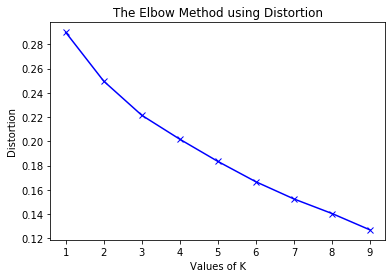

In [65]:
plt.plot(kclusters, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [66]:
#Using the different values of Inertia

for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 3.107024107497237
2 : 2.133150336326347
3 : 1.6393551621931999
4 : 1.399314821438763
5 : 1.1846482898075816
6 : 1.003602272136848
7 : 0.8731289507631997
8 : 0.7779535024830725
9 : 0.6584183755905078


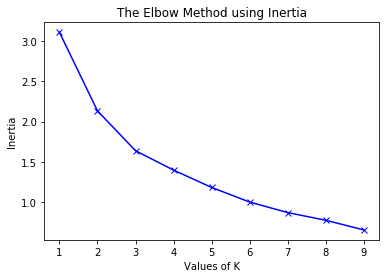

In [67]:
plt.plot(kclusters, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

The above Distortion/Inertia plots show elbows at place 2. But, at 3 points, the line started to decrease. The elbows are not sharply shifting, but they show that point 3 is the best value of K. Remember, increasing the K will always reduce the error.

In [68]:
kclusters= 3

Let's create a new data frame that includes the clusters and the top 10 venues for each neighborhood.

In [69]:
# add clustering labels
neighborhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SFV_merged = SFV_data

# merge LA_grouped with LA_data to add latitude/longitude for each neighborhood
SFV_merged = SFV_merged.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhoods')


SFV_merged.head() # check the last columns!

,ZIP Code,Neighborhoods,Latitude,Longitude,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,91306,Winnetka,34.208404020000046,-118.57593995299999,San Fernando Valley,1,Mexican Restaurant,Fried Chicken Joint,Bar,South American Restaurant,Filipino Restaurant,Grocery Store,Latin American Restaurant,Convenience Store,Ice Cream Shop,Fast Food Restaurant
1,91345,San Fernando,34.26212132300003,-118.46175755399997,San Fernando Valley,1,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Garden,Frozen Yogurt Shop,Park,Coffee Shop,Sandwich Place,Seafood Restaurant
2,91356,Tarzana,34.16990292600008,-118.54048905299999,San Fernando Valley,1,Mexican Restaurant,Italian Restaurant,Brazilian Restaurant,Bank,Deli / Bodega,Japanese Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Grocery Store
3,91344,Granada Hills,34.27480004900008,-118.50113633799998,San Fernando Valley,1,Chinese Restaurant,Pizza Place,Coffee Shop,Grocery Store,Clothing Store,Gas Station,Fast Food Restaurant,Restaurant,Sporting Goods Shop,Bar
4,91606,North Hollywood,34.186731132000034,-118.38680620899999,San Fernando Valley,1,Coffee Shop,Theater,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Bank,Bar,Dance Studio,Thai Restaurant,Gym / Fitness Center


In [70]:
SFV_merged.shape

(41, 16)

Verifying null values

In [71]:
SFV_merged['Cluster Labels'].isnull().sum()

0

Then, we removed the null value and verified it.

In [72]:
SFV_merged=SFV_merged.dropna()

In [73]:
SFV_merged['Cluster Labels'].isnull().sum()

0

We must convert Cluster Labels type to an integer because it'll generate an error on Visualizing the results clusters--> TypeError: list indices must be integers or slices, not floats.

In [74]:
SFV_merged.dtypes

ZIP Code                   int64
Neighborhoods             object
Latitude                  object
Longitude                 object
Region                    object
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
6th Most Common Venue     object
7th Most Common Venue     object
8th Most Common Venue     object
9th Most Common Venue     object
10th Most Common Venue    object
dtype: object

SFV_merged= SFV_merged['Cluster Labels'].astype(int)
SFV_merged

SFV_merged

SFV_merged=SFV_merged['Cluster Labels'].astype(int)

Finally, let's visualize the resulting clusters

In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SFV_merged['Latitude'], SFV_merged['Longitude'], SFV_merged['Neighborhoods'], SFV_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
#color=rainbow[cluster-1],#was commented
        color = rainbow[int(cluster)-1],
#fill_color=rainbow[cluster-1],#was commented
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## IV. Results

## 9. Examine Clusters: San Fernando Valley

To determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we assigned a name to each cluster.

<h3>Cluster 1 </h3>

In [76]:
# Cluster 1 ==> 'Cluster Labels'] == 0
# SFV_merged.columns[[1] ==> It is the column wanted to show-index[1] --> it is the Neighborhoods column
cluster_1=SFV_merged.loc[SFV_merged['Cluster Labels'] == 0, SFV_merged.columns[[1] + list(range(5, SFV_merged.shape[1]))]]
cluster_1

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,West Hills,0,Garden Center,Astrologer,Yoga Studio,Farmers Market,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service


<h3>Cluster 2 </h3>

In [78]:
# # Cluster 2 ==> 'Cluster Labels'] == 1
cluster_2=SFV_merged.loc[SFV_merged['Cluster Labels'] == 1, SFV_merged.columns[[1] + list(range(5, SFV_merged.shape[1]))]]
cluster_2

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Winnetka,1,Mexican Restaurant,Fried Chicken Joint,Bar,South American Restaurant,Filipino Restaurant,Grocery Store,Latin American Restaurant,Convenience Store,Ice Cream Shop,Fast Food Restaurant
1,San Fernando,1,Mexican Restaurant,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Garden,Frozen Yogurt Shop,Park,Coffee Shop,Sandwich Place,Seafood Restaurant
2,Tarzana,1,Mexican Restaurant,Italian Restaurant,Brazilian Restaurant,Bank,Deli / Bodega,Japanese Restaurant,Sandwich Place,Indian Restaurant,Pizza Place,Grocery Store
3,Granada Hills,1,Chinese Restaurant,Pizza Place,Coffee Shop,Grocery Store,Clothing Store,Gas Station,Fast Food Restaurant,Restaurant,Sporting Goods Shop,Bar
4,North Hollywood,1,Coffee Shop,Theater,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Bank,Bar,Dance Studio,Thai Restaurant,Gym / Fitness Center
5,Encino,1,Sandwich Place,Restaurant,Pizza Place,ATM,Steakhouse,Seafood Restaurant,Salad Place,Clothing Store,Coffee Shop,Comfort Food Restaurant
6,Northridge,1,Chinese Restaurant,Coffee Shop,Dessert Shop,Vietnamese Restaurant,Home Service,Thai Restaurant,Automotive Shop,Bubble Tea Shop,Fast Food Restaurant,Convenience Store
7,North Hollywood,1,Coffee Shop,Theater,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Bank,Bar,Dance Studio,Thai Restaurant,Gym / Fitness Center
8,Chatsworth,1,Train Station,Hotel,Storage Facility,Sushi Restaurant,Bar,Farmers Market,Food,Flower Shop,Flea Market,Fish & Chips Shop
9,Lake View Terrace,1,Sandwich Place,Coffee Shop,Flea Market,Fast Food Restaurant,Baseball Field,Bank,Mexican Restaurant,Spa,Gym / Fitness Center,Convenience Store


In [131]:
cluster_2['Neighborhoods'].unique()

array(['Winnetka', 'San Fernando', 'Tarzana', 'Granada Hills',
       'North Hollywood', 'Encino', 'Northridge', 'Chatsworth',
       'Lake View Terrace', 'Van Nuys', 'North Hills', 'Universal City',
       'Lake Balboa', 'Sherman Oaks', 'Toluca Lake', 'Reseda',
       'Studio City', 'Burbank', 'Porter Ranch', 'Panorama City',
       'Sun Valley', 'Valley Village', 'Canoga Park', 'Woodland Hills'],
      dtype=object)

<h3>Cluster 3 </h3>

In [79]:
# # Cluster 2 ==> 'Cluster Labels'] == 1
cluster_3=SFV_merged.loc[SFV_merged['Cluster Labels'] == 2, SFV_merged.columns[[1] + list(range(5, SFV_merged.shape[1]))]]
cluster_3.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Pacoima,2,Accessories Store,Yoga Studio,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Financial or Legal Service,Film Studio


<h3>Results : Most common Restaurants and Places to eat within Cluster 1, 2, and 3</h3> 

The type of food for the restaurant is not defined yet, either the location. Although at this stage the client can have the information required to make a decision. 

The results of the most common venues help to know more about the Restaurant industry and customer preferences. 
In our case, we focused on Restaurants and Places to eat already labeled within the three clusters. According to the Cluster’s findings, San Fernando Valley has a large variety of restaurants that offer international cuisines, such as Latin, Asian, and European.

 **Most common Restaurants and Places to eat within Cluster 1**

In [80]:
#Source: https://thispointer.com/pandas-get-unique-values-in-single-or-multiple-columns-of-a-dataframe-in-python/
#uniqueValues = (empDfObj['Name'].append(empDfObj['Age'])).unique() 
# Get unique elements in multiple columns

uniqueValues_cluster1 = (cluster_1['1st Most Common Venue'].append(cluster_1['2nd Most Common Venue']).append(cluster_1['3rd Most Common Venue']).append(cluster_1['4th Most Common Venue']).append(cluster_1['5th Most Common Venue']).append(cluster_1['6th Most Common Venue']).append(cluster_1['7th Most Common Venue']).append(cluster_1['8th Most Common Venue']).append(cluster_1['9th Most Common Venue']).append(cluster_1['10th Most Common Venue'])).unique()

                                                                                                                                             
print('Unique elements in the 10 columns of Most Common Venues :')
print(uniqueValues_cluster1)

#In case of required convert one-dimensional NumPy Array to List
#list1 = uniqueValues.tolist()
#print(f'List: {list1}')

Unique elements in the 10 columns of Most Common Venues :
['Garden Center' 'Astrologer' 'Yoga Studio' 'Farmers Market'
 'Food & Drink Shop' 'Food' 'Flower Shop' 'Flea Market'
 'Fish & Chips Shop' 'Financial or Legal Service']


In [79]:
type(uniqueValues_cluster1)

numpy.ndarray

In [80]:
#kk=', '.join(uniqueValues_cluster1)

In [81]:
# processed by hand=Extract from the uniqueValues_cluster1
#Cluster1_most_common_venues_Restaurant_and_Places_in_SFV = ['Mexican Restaurant', 'Chinese Restaurant', 'Pizza Place', 'Sandwich Place', 'Vietnamese Restaurant', 'Indian Restaurant', 'Sushi Restaurant', 'Breakfast Spot', 'Fried Chicken Joint', 'Fast Food Restaurant', 'Japanese Restaurant', 'American Restaurant', 'Filipino Restaurant', 'Italian Restaurant', 'Salad Place', 'Thai Restaurant', 'Mediterranean Restaurant', 'Middle Eastern Restaurant', 'Korean Restaurant', 'Food Truck', 'Latin American Restaurant', 'Brazilian Restaurant', 'Burger Joint', 'French Restaurant', 'Wings Joint', 'Steakhouse', 'Cuban Restaurant', 'Seafood Restaurant', 'South American Restaurant', 'Eastern European Restaurant', 'Kosher Restaurant']
Cluster1_most_common_venues_Restaurant_and_Places_in_SFV =['Food & Drink Shop','Fish & Chips Shop']
Cluster1_most_common_venues_Restaurant_and_Places_in_SFV

['Food & Drink Shop', 'Fish & Chips Shop']

Counting the ocurrence of the type of restaurants within the cluster 1

In [82]:
pd.set_option('display.max_columns', None)

In [83]:
#cluster_1.apply(pd.Series.value_counts, axis=1)
freq_cluster1=cluster_1.stack().str.get_dummies().sum(level=1)
freq_cluster1.head()

,0,Astrologer,Farmers Market,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Garden Center,West Hills,Yoga Studio
Neighborhoods,0,0,0,0,0,0,0,0,0,0,1,0
Cluster Labels,1,0,0,0,0,0,0,0,0,0,0,0
1st Most Common Venue,0,0,0,0,0,0,0,0,0,1,0,0
2nd Most Common Venue,0,1,0,0,0,0,0,0,0,0,0,0
3rd Most Common Venue,0,0,0,0,0,0,0,0,0,0,0,1


Above dataframe - freq_cluster1 includes unwanted columns, thus we only kept the Restaurants' common venues, wich we already obtained - Cluster1_most_commom_venues_Restaurant_and_Places_in_SFV

In [84]:
# processed by hand=Extract from Cluster1_most_common_venues_Restaurant_and_Places_in_SFV
#freq_cluster1=freq_cluster1[['Mexican Restaurant', 'Chinese Restaurant', 'Pizza Place', 'Sandwich Place', 'Vietnamese Restaurant', 'Indian Restaurant', 'Sushi Restaurant', 'Breakfast Spot', 'Fried Chicken Joint', 'Fast Food Restaurant', 'Japanese Restaurant', 'American Restaurant', 'Filipino Restaurant', 'Italian Restaurant', 'Salad Place', 'Thai Restaurant', 'Mediterranean Restaurant', 'Middle Eastern Restaurant', 'Korean Restaurant', 'Food Truck', 'Latin American Restaurant', 'Brazilian Restaurant', 'Burger Joint', 'French Restaurant', 'Wings Joint', 'Steakhouse', 'Cuban Restaurant', 'Seafood Restaurant', 'South American Restaurant', 'Eastern European Restaurant', 'Kosher Restaurant']]
freq_cluster1=freq_cluster1[['Food & Drink Shop','Fish & Chips Shop']]
freq_cluster1.head()

,Food & Drink Shop,Fish & Chips Shop
Neighborhoods,0,0
Cluster Labels,0,0
1st Most Common Venue,0,0
2nd Most Common Venue,0,0
3rd Most Common Venue,0,0


Transposing the columns to sum up the values by Restaurant's types

In [85]:
freq_cluster1 = freq_cluster1.T
freq_cluster1.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Food & Drink Shop,0,0,0,0,0,0,1,0,0,0,0,0
Fish & Chips Shop,0,0,0,0,0,0,0,0,0,0,1,0


Adding a new column to sum up the Restaurant's types

In [86]:
freq_cluster1['sum'] = freq_cluster1.sum(axis=1)
freq_cluster1.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,sum
Food & Drink Shop,0,0,0,0,0,0,1,0,0,0,0,0,1
Fish & Chips Shop,0,0,0,0,0,0,0,0,0,0,1,0,1


In [87]:
freq_cluster1=freq_cluster1.sort_values('sum')

Keeping only wanted columns to show summary of Restaurant's types

In [88]:
freq_cluster1=freq_cluster1['sum']
freq_cluster1

Food & Drink Shop    1
Fish & Chips Shop    1
Name: sum, dtype: int64

Defining x and y values

In [89]:
y=freq_cluster1.values

In [90]:
x=freq_cluster1.index

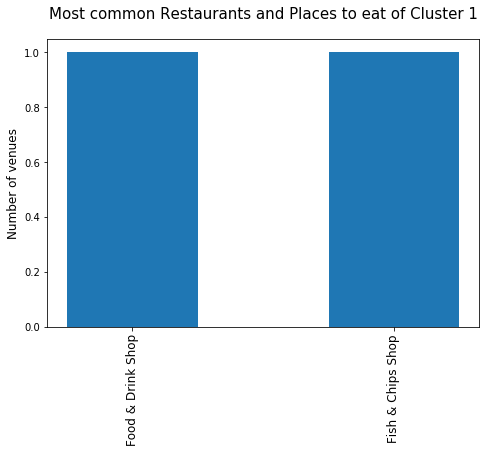

<Figure size 1440x216 with 0 Axes>

In [91]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Most common Restaurants and Places to eat of Cluster 1', fontsize=15, pad=20)
plt.ylabel('Number of venues', fontsize=12)
rest= x #['mexican Restaurant', ...]
num = y #[ 1,  ...]
plt.xticks(rotation=90, fontsize= 12)
ax.bar(rest, num, width=0.5)
plt.figure(figsize=(20,3))
plt.show()

**Most commom Restaurants and Places to eat in Cluster 2**

In [106]:
uniqueValues_cluster2 = (cluster_2['1st Most Common Venue'].append(cluster_2['2nd Most Common Venue']).append(cluster_2['3rd Most Common Venue']).append(cluster_2['4th Most Common Venue']).append(cluster_2['5th Most Common Venue']).append(cluster_2['6th Most Common Venue']).append(cluster_2['7th Most Common Venue']).append(cluster_2['8th Most Common Venue']).append(cluster_2['9th Most Common Venue']).append(cluster_2['10th Most Common Venue'])).unique()
                                                                                                                                             
print('Unique elements in the 10 columns of Most Common Venues :')
print(uniqueValues_cluster2)

Unique elements in the 10 columns of Most Common Venues :
['Mexican Restaurant' 'Chinese Restaurant' 'Coffee Shop' 'Sandwich Place'
 'Train Station' 'Intersection' 'Theme Park Ride / Attraction' 'Hotel Bar'
 'Café' 'Food Truck' 'Vietnamese Restaurant' 'Sushi Restaurant'
 'Pizza Place' 'Home Service' 'Shoe Store' 'Sculpture Garden'
 'Cosmetics Shop' 'Indian Restaurant' 'Pool' 'Fried Chicken Joint'
 'Italian Restaurant' 'Theater' 'Restaurant' 'Hotel' 'Theme Park'
 'Taco Place' 'Spa' 'Gift Shop' 'Clothing Store' 'Playground'
 'Fast Food Restaurant' 'Convenience Store' 'Bar' 'Brazilian Restaurant'
 'Dessert Shop' 'Storage Facility' 'Flea Market' 'Furniture / Home Store'
 'Thai Restaurant' 'Supermarket' 'Ice Cream Shop' 'Mobile Phone Shop'
 'Cuban Restaurant' 'South American Restaurant' 'Bank' 'Grocery Store'
 'ATM' 'Korean Restaurant' 'Souvenir Shop' 'Breakfast Spot' 'Pharmacy'
 'Shopping Mall' 'Filipino Restaurant' 'Garden' 'Deli / Bodega'
 'Steakhouse' 'Baseball Field' 'American Restaura

Creating a list with all the restaurants in cluster 2- no duplicated values

In [107]:
# processed by hand=Extract from the uniqueValues_cluster2
Cluster2_most_commom_venues_Restaurant_and_Places_in_SFV= ['Mexican Restaurant' ,'Chinese Restaurant' ,'Sandwich Place','Food Truck', 'Vietnamese Restaurant', 'Sushi Restaurant','Pizza Place' ,'Indian Restaurant' , 'Fried Chicken Joint', 'Italian Restaurant', 'Taco Place' , 'Fast Food Restaurant','Brazilian Restaurant', 'Thai Restaurant', 'Cuban Restaurant', 'South American Restaurant','Korean Restaurant', 'Breakfast Spot','Filipino Restaurant', 'Steakhouse','American Restaurant', 'Seafood Restaurant','Japanese Restaurant','Eastern European Restaurant', 'Latin American Restaurant', 'Salad Place', 'Greek Restaurant' , 'Fish & Chips Shop' , 'New American Restaurant' ,'Middle Eastern Restaurant' ,'Comfort Food Restaurant']
#['French Restaurant', 'Food Truck']

Counting the ocurrence of the type of restaurants within the cluster

In [108]:
#Source: How to generate frequency count for all variables --> https://stackoverflow.com/questions/51615437/python-how-to-generate-frequency-count-for-all-variables -- Author: YOBEN_S
#cluster_2['1st Most Common Venue'].value_counts() # works only for 1 column

freq_cluster2=cluster_2.stack().str.get_dummies().sum(level=1)
freq_cluster2.head()

,1,ATM,American Restaurant,Arts & Crafts Store,Auto Workshop,Automotive Shop,Bank,Bar,Baseball Field,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burbank,Café,Canoga Park,Chatsworth,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Eastern European Restaurant,Encino,Event Service,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gift Shop,Golf Course,Granada Hills,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Home Service,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lake Balboa,Lake View Terrace,Latin American Restaurant,Laundromat,Liquor Store,Massage Studio,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Music Venue,New American Restaurant,North Hills,North Hollywood,Northridge,Office,Panorama City,Park,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Pool,Porter Ranch,Rental Car Location,Reseda,Restaurant,River,Salad Place,Salon / Barbershop,San Fernando,Sandwich Place,Sculpture Garden,Seafood Restaurant,Sherman Oaks,Shoe Store,Shopping Mall,Smoke Shop,South American Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Steakhouse,Storage Facility,Studio City,Sun Valley,Supermarket,Sushi Restaurant,Taco Place,Tarzana,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Toluca Lake,Train Station,Universal City,Valley Village,Van Nuys,Vietnamese Restaurant,Winnetka,Woodland Hills,Yoga Studio
Neighborhoods,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,3,0,1,2,0
Cluster Labels,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1st Most Common Venue,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,0,0,0,0,0,0,0,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2nd Most Common Venue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0
3rd Most Common Venue,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2,0,6,0,1,0,1,0,0,0,3,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Above dataframe - freq_cluster2 includes unwanted columns, thus we only kept the Restaurants' common venues, wich we already obtained - Cluster2_most_commom_venues_Restaurant_and_Places_in_SFV

In [109]:
freq_cluster2=freq_cluster2[['Mexican Restaurant' ,'Chinese Restaurant' ,'Sandwich Place','Food Truck', 'Vietnamese Restaurant', 'Sushi Restaurant','Pizza Place' ,'Indian Restaurant' , 'Fried Chicken Joint', 'Italian Restaurant', 'Taco Place' , 'Fast Food Restaurant','Brazilian Restaurant', 'Thai Restaurant', 'Cuban Restaurant', 'South American Restaurant','Korean Restaurant', 'Breakfast Spot','Filipino Restaurant', 'Steakhouse','American Restaurant', 'Seafood Restaurant','Japanese Restaurant','Eastern European Restaurant', 'Latin American Restaurant', 'Salad Place', 'Greek Restaurant' , 'Fish & Chips Shop' , 'New American Restaurant' ,'Middle Eastern Restaurant' ,'Comfort Food Restaurant']]
freq_cluster2.head()

,Mexican Restaurant,Chinese Restaurant,Sandwich Place,Food Truck,Vietnamese Restaurant,Sushi Restaurant,Pizza Place,Indian Restaurant,Fried Chicken Joint,Italian Restaurant,Taco Place,Fast Food Restaurant,Brazilian Restaurant,Thai Restaurant,Cuban Restaurant,South American Restaurant,Korean Restaurant,Breakfast Spot,Filipino Restaurant,Steakhouse,American Restaurant,Seafood Restaurant,Japanese Restaurant,Eastern European Restaurant,Latin American Restaurant,Salad Place,Greek Restaurant,Fish & Chips Shop,New American Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant
Neighborhoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cluster Labels,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1st Most Common Venue,4,4,6,1,1,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2nd Most Common Venue,6,0,0,0,0,0,4,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3rd Most Common Venue,0,2,2,0,0,0,6,0,0,0,0,5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Transposing the columns to sum up the values by Restaurant's types

In [110]:
freq_cluster2 = freq_cluster2.T
freq_cluster2.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Mexican Restaurant,0,0,4,6,0,0,6,2,2,0,1,0
Chinese Restaurant,0,0,4,0,2,0,0,0,1,0,1,0
Sandwich Place,0,0,6,0,2,0,0,0,2,1,2,2
Food Truck,0,0,1,0,0,1,0,0,0,0,0,0
Vietnamese Restaurant,0,0,1,0,0,3,0,0,0,0,0,0


Adding a new column to sum up the Restaurant's types

In [111]:
freq_cluster2['sum'] = freq_cluster2.sum(axis=1)
freq_cluster2.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,sum
Mexican Restaurant,0,0,4,6,0,0,6,2,2,0,1,0,21
Chinese Restaurant,0,0,4,0,2,0,0,0,1,0,1,0,8
Sandwich Place,0,0,6,0,2,0,0,0,2,1,2,2,15
Food Truck,0,0,1,0,0,1,0,0,0,0,0,0,2
Vietnamese Restaurant,0,0,1,0,0,3,0,0,0,0,0,0,4


In [112]:
freq_cluster2=freq_cluster2.sort_values('sum')

Keeping only wanted columns to show summary of Restaurant's types

In [113]:
freq_cluster2=freq_cluster2['sum']
freq_cluster2

South American Restaurant       1
New American Restaurant         1
Greek Restaurant                1
Latin American Restaurant       1
Eastern European Restaurant     1
Japanese Restaurant             1
Italian Restaurant              1
Taco Place                      1
Middle Eastern Restaurant       1
Brazilian Restaurant            1
Cuban Restaurant                1
Fish & Chips Shop               2
Salad Place                     2
Steakhouse                      2
Comfort Food Restaurant         2
Fried Chicken Joint             2
Food Truck                      2
Korean Restaurant               3
Breakfast Spot                  3
American Restaurant             3
Indian Restaurant               3
Sushi Restaurant                3
Vietnamese Restaurant           4
Filipino Restaurant             5
Seafood Restaurant              8
Chinese Restaurant              8
Thai Restaurant                 8
Sandwich Place                 15
Fast Food Restaurant           17
Mexican Restau

Defining x and y values

In [114]:
y=freq_cluster2.values

In [115]:
x=freq_cluster2.index

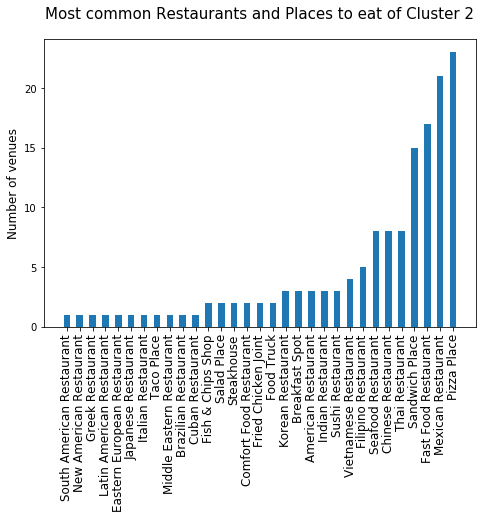

<Figure size 1440x216 with 0 Axes>

In [116]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Most common Restaurants and Places to eat of Cluster 2', fontsize=15, pad=20)
plt.ylabel('Number of venues', fontsize=12)
rest= x
num = y
plt.xticks(rotation=90, fontsize= 12)
ax.bar(rest, num, width=0.5)
plt.figure(figsize=(20,3))
plt.show()

**Most commom Restaurants and Places to eat in Cluster 3**

In [118]:
uniqueValues_cluster3 = (cluster_3['1st Most Common Venue'].append(cluster_3['2nd Most Common Venue']).append(cluster_3['3rd Most Common Venue']).append(cluster_3['4th Most Common Venue']).append(cluster_3['5th Most Common Venue']).append(cluster_3['6th Most Common Venue']).append(cluster_3['7th Most Common Venue']).append(cluster_3['8th Most Common Venue']).append(cluster_3['9th Most Common Venue']).append(cluster_3['10th Most Common Venue'])).unique()
                                                                                                                                             
print('Unique elements in the 10 columns of Most Common Venues :')
print(uniqueValues_cluster3)

Unique elements in the 10 columns of Most Common Venues :
['Accessories Store' 'Yoga Studio' 'Falafel Restaurant'
 'Food & Drink Shop' 'Food' 'Flower Shop' 'Flea Market'
 'Fish & Chips Shop' 'Financial or Legal Service' 'Film Studio']


In [119]:
type(uniqueValues_cluster3)

numpy.ndarray

Creating a list with all the restaurants in cluster 3- no duplicated values

In [120]:
#Cluster3_most_commom_venues_Restaurant_and_Places_in_SFV=['Food Truck','Fish & Chips Shop']
Cluster3_most_common_venues_Restaurant_and_Places_in_SFV = ['Falafel Restaurant', 'Food & Drink Shop', 'Fish & Chips Shop']

Counting the ocurrence of the type of restaurants within the cluster

In [121]:
#Source: How to generate frequency count for all variables --> https://stackoverflow.com/questions/51615437/python-how-to-generate-frequency-count-for-all-variables -- Author: YOBEN_S
#cluster_3['1st Most Common Venue'].value_counts() # works only for 1 column

freq_cluster3=cluster_3.stack().str.get_dummies().sum(level=1)
freq_cluster3.head()

,2,Accessories Store,Falafel Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Pacoima,Yoga Studio
Neighborhoods,0,0,0,0,0,0,0,0,0,0,1,0
Cluster Labels,1,0,0,0,0,0,0,0,0,0,0,0
1st Most Common Venue,0,1,0,0,0,0,0,0,0,0,0,0
2nd Most Common Venue,0,0,0,0,0,0,0,0,0,0,0,1
3rd Most Common Venue,0,0,1,0,0,0,0,0,0,0,0,0


Above dataframe - freq_cluster3 includes unwanted columns, thus we only kept the Restaurants' common venues, wich we already obtained - Cluster3_most_commom_venues_Restaurant_and_Places_in_SFV

In [122]:
#freq_cluster3=freq_cluster3[['Food Truck','Fish & Chips Shop']]

freq_cluster3=freq_cluster3[['Falafel Restaurant', 'Food & Drink Shop', 'Fish & Chips Shop']]
freq_cluster3.head()

,Falafel Restaurant,Food & Drink Shop,Fish & Chips Shop
Neighborhoods,0,0,0
Cluster Labels,0,0,0
1st Most Common Venue,0,0,0
2nd Most Common Venue,0,0,0
3rd Most Common Venue,1,0,0


Transposing the columns to sum up the values by Restaurant's types

In [123]:
freq_cluster3 = freq_cluster3.T
freq_cluster3.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Falafel Restaurant,0,0,0,0,1,0,0,0,0,0,0,0
Food & Drink Shop,0,0,0,0,0,1,0,0,0,0,0,0
Fish & Chips Shop,0,0,0,0,0,0,0,0,0,1,0,0


Adding a new column to sum up the Restaurant's types

In [124]:
freq_cluster3['sum'] = freq_cluster3.sum(axis=1)
freq_cluster3.head()

,Neighborhoods,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,sum
Falafel Restaurant,0,0,0,0,1,0,0,0,0,0,0,0,1
Food & Drink Shop,0,0,0,0,0,1,0,0,0,0,0,0,1
Fish & Chips Shop,0,0,0,0,0,0,0,0,0,1,0,0,1


Sorting sum values

In [125]:
freq_cluster3=freq_cluster3.sort_values('sum')

Keeping only wanted columns to show summary of Restaurant's types

In [126]:
freq_cluster3=freq_cluster3['sum']
freq_cluster3

Falafel Restaurant    1
Food & Drink Shop     1
Fish & Chips Shop     1
Name: sum, dtype: int64

Defining x and y values

In [127]:
y=freq_cluster3.values

In [128]:
x=freq_cluster3.index

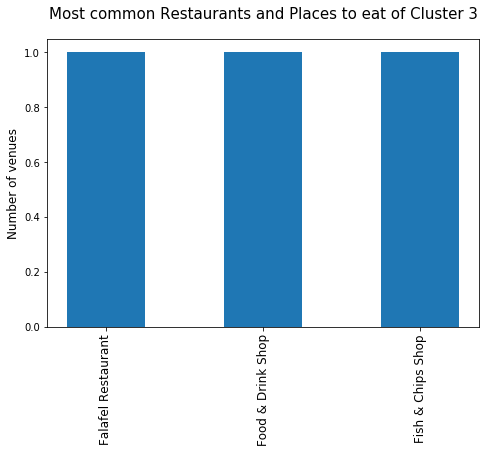

<Figure size 1440x216 with 0 Axes>

In [129]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Most common Restaurants and Places to eat of Cluster 3', fontsize=15, pad=20)
plt.ylabel('Number of venues', fontsize=12)
rest= x
num = y
plt.xticks(rotation=90, fontsize= 12)
ax.bar(rest, num, width=0.5)
plt.figure(figsize=(20,3))
plt.show()

## V.   Discussion 

<p>According to the three above plots, SFV has a large variety of restaurants that offer International cuisine. 

Clusters 1 and 3 have a small size, there is a balanced tendency for each type of food.

Cluster 2 contains the largest venue numbers and covered a vast zone of San Fernando Valley, where the leader of the type of Restaurant is the Pizza. Follow by the Mexican restaurants, next, the Fast food. Next, the Sandwich places. Finally, similar preferences for Thai Restaurants, Chinese restaurants, and Seafood restaurants.

According to these finds, we suggest working on this top five of the cuisine. Cluster 2 has almost the total of the venues, thus the restaurant's location should be placed within this area.

In sum, the client can launch the new restaurant within this established market-top five venues and place it at any location in Cluster 2’s neighborhoods. These neighborhoods are: Winnetka, San Fernando, Tarzana, Granada Hills, North Hollywood, Encino, Northridge, Chatsworth, Lake View Terrace, Van Nuys, North Hills, Universal City, Lake Balboa, Sherman Oaks, Toluca Lake, Reseda, Studio City, Burbank, Porter Ranch, Panorama City, Sun Valley, Valley Village, Canoga Park, and Woodland Hills.
</p>

<h1><center>Second Chapter: setting the Client's residence place</center>

## II. Data : 1. Data Wrangling
## *1.1 First Data : Forecast home values - By Region Name*

Source: https://www.zillow.com/research/data/ --> Direct dowloaded from the web page to Excel

Exploratory analysis to obtain the forecast of home values during the last month - April 2020

In [132]:
df5=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/AllRegionsForePublic.csv")
df5.head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Country,United States,NaN,NaN,NaN,2021-04-30,-1.1
1,State,Alabama,AL,NaN,NaN,2021-04-30,-0.7
2,State,Alaska,AK,NaN,NaN,2021-04-30,-4.2
3,State,Arizona,AZ,NaN,NaN,2021-04-30,0.0
4,State,Arkansas,AR,NaN,NaN,2021-04-30,-1.2


## II. Data : 2. Data Cleaning
## *2.1 First Data : Forecast home values - By Region Name*

Filtering by California state, type of region - Neighborhood, and by County- Los Angeles

In [133]:
df5=df5[df5['StateName']== 'CA'].reset_index(drop=True)
df5=df5[df5['Region']== 'Neighborhood'].reset_index(drop=True)
df5=df5[df5['CountyName']== 'Los Angeles County'].reset_index(drop=True)
df5.head()

,Region,RegionName,StateName,CountyName,CityName,ForecastedDate,ForecastYoYPctChange
0,Neighborhood,Adams Hill,CA,Los Angeles County,Glendale,2021-04-30,-0.9
1,Neighborhood,Adams-Normandie,CA,Los Angeles County,Los Angeles,2021-04-30,1.5
2,Neighborhood,Alamitos Beach,CA,Los Angeles County,Long Beach,2021-04-30,-0.7
3,Neighborhood,Alamitos Heights,CA,Los Angeles County,Long Beach,2021-04-30,-0.3
4,Neighborhood,Arbol Verde,CA,Los Angeles County,Claremont,2021-04-30,-0.4


Dropping un wanted columns

In [134]:
df5=df5.drop(['ForecastedDate', 'StateName'], axis=1)
df5.head()

,Region,RegionName,CountyName,CityName,ForecastYoYPctChange
0,Neighborhood,Adams Hill,Los Angeles County,Glendale,-0.9
1,Neighborhood,Adams-Normandie,Los Angeles County,Los Angeles,1.5
2,Neighborhood,Alamitos Beach,Los Angeles County,Long Beach,-0.7
3,Neighborhood,Alamitos Heights,Los Angeles County,Long Beach,-0.3
4,Neighborhood,Arbol Verde,Los Angeles County,Claremont,-0.4


Filtering by the 23 neighborhoods wanted (from cluster 1)

In [135]:
select_targets=cluster_1['Neighborhoods'].unique()
select_targets

array(['West Hills'], dtype=object)

In [136]:
#copy by hand from the above line
targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'
targets

('Winnetka',
 'San Fernando',
 'Tarzana',
 'Granada Hills',
 'North Hollywood',
 'Encino',
 'Northridge',
 'Chatsworth',
 'Lake View Terrace',
 'Van Nuys',
 'North Hills',
 'Universal City',
 'Lake Balboa',
 'Sherman Oaks',
 'Toluca Lake',
 'Reseda',
 'Studio City',
 'Burbank',
 'Porter Ranch',
 'Panorama City',
 'Valley Village',
 'Canoga Park',
 'Woodland Hills')

In [137]:
#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern = '|'.join([r'\b{}\b'.format(target) for target in targets])
df_target= df5[df5['RegionName'].str.contains(pattern, regex = True)].reset_index(drop=True)
df_target_forecast=df_target.sort_values('ForecastYoYPctChange') #descending order
df_target_forecast

,Region,RegionName,CountyName,CityName,ForecastYoYPctChange
0,Neighborhood,Burbank Center,Los Angeles County,Burbank,-1.4
14,Neighborhood,Tarzana,Los Angeles County,Los Angeles,-0.4
3,Neighborhood,Encino,Los Angeles County,Los Angeles,-0.1
15,Neighborhood,Toluca Lake,Los Angeles County,Los Angeles,-0.0
10,Neighborhood,Porter Ranch,Los Angeles County,Los Angeles,-0.0
19,Neighborhood,Woodland Hills,Los Angeles County,Los Angeles,-0.0
2,Neighborhood,Chatsworth,Los Angeles County,Los Angeles,0.1
4,Neighborhood,Granada Hills,Los Angeles County,Los Angeles,0.3
8,Neighborhood,Northridge,Los Angeles County,Los Angeles,0.4
7,Neighborhood,North Hollywood,Los Angeles County,Los Angeles,0.5


## III. Methodology : 3. Exploratory Data Analysis
## *3.1 First Data : Forecast home values - By Region Name*

In [138]:
df_target_forecast.shape

(20, 5)

In [139]:
df_target_forecast.isnull().sum(axis = 0)

Region                  0
RegionName              0
CountyName              0
CityName                0
ForecastYoYPctChange    0
dtype: int64

In [140]:
df_target_forecast.dtypes

Region                   object
RegionName               object
CountyName               object
CityName                 object
ForecastYoYPctChange    float64
dtype: object

## IV. Communicating findings: 4. Visualization
## *4.1 First Data : Forecast home values - By Region Name*

In [141]:
x=df_target_forecast.RegionName
y= df_target_forecast.ForecastYoYPctChange

<function matplotlib.pyplot.show(*args, **kw)>

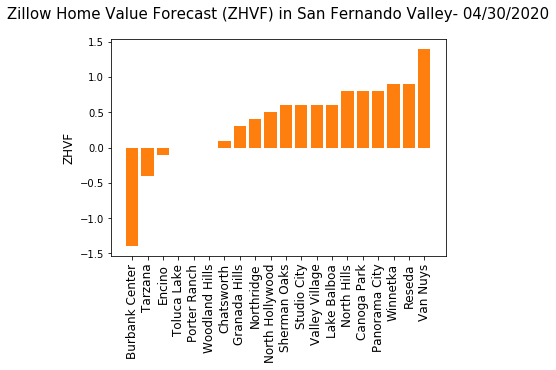

<Figure size 1080x1080 with 0 Axes>

In [142]:
heights = y
bars = x
plt.bar(x, y, data=df_target_forecast)
plt.title('Zillow Home Value Forecast (ZHVF) in San Fernando Valley- 04/30/2020', fontsize=15, pad=20)
plt.ylabel('ZHVF', fontsize=12)

y_pos = range(len(bars))
plt.bar(y_pos, heights)
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90, fontsize=12)
plt.figure(figsize=(15, 15))
plt.show

In [143]:
print(emoji.emojize(':pushpin: Voila! Above the df_target_forecast has the Zillow home value forecast of each neighborhood selected, in San Fernando Valley.'))

📌 Voila! Above the df_target_forecast has the Zillow home value forecast of each neighborhood selected, in San Fernando Valley.


## II. Data : 1. Data Collection
## *1.2 Second Data : All single-family homes data by the number of bedrooms*

Source: https://www.zillow.com/research/data/ --> Five files - Direct dowloaded from the web page to Excel

**Getting data of 1 bedroom**

In [144]:
df1=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/Neighborhood_Zhvi_1bedroom.csv")
df1.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57126.0,56408.0,55851.0,54707.0,53737

In [145]:
#no crash

#1. Filtering by the counties wanted, and dropping the un wanted --> target_county_dfs

df1_target=df1[df1.CountyName == 'Los Angeles County']
df1_target

#2. Filtering by cities and neighborhoods wanted--> targets

targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'

#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern_df1_ = '|'.join([r'\b{}\b'.format(target) for target in targets])
df1_target_= df1_target[df1_target['RegionName'].str.contains(pattern_df1_, regex = True)].reset_index(drop=True)
df1_target_

#3. Adding a new column to identify this dataframe - bedroom 1. It'll be useful for further process

df1_target_['bedroom'] = 1
df1_target_.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,84246.0,82839.0,81645.0,79604.0,77885.0,77048.0,75775.0,75051.0,73427.0,72439.0,71480.0,70880.0,70226.0,69717.0,69739.0,69947.0,70003.0,69295.0,69393.0,69379.0,70585.0,71130.0,71891.0,72519.0,73425.0,74620.0,75408.0,75596.0,76320.0,77181.0,78152.0,78309.0,79084.0,80032.0,81268.0,81788.0,82610.0,83436.0,84545.0,85967.0,86525.0,86812.0,87005.0,88373.0,88992.0,89924.0,89946.0,91567.0,92303.0,93094.0,93065.0,93727.0,95153.0,97237.0,97643.0,96940.0,95398.0,94921.0,94949.0,95230.0,95940.0,97211.0,98463.0,98971.0,99489.0,100016.0,101509.0,103309.0,105737.0,107636.0,109625.0,110752.0,111935.0,112741.0

**Getting data of 2 bedrooms**

In [146]:
df2=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/Neighborhood_Zhvi_2bedroom.csv")
df2.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,90075.0,90067.0,90262.0,90536.0,90808.0,90950.0,90854.0,91063.0,91095.0,91430.0,91369.0,91502.0,91524.0,91725.0,91602.0,91465.0,91351.0,91596.0,92114.0,92237.0,92446.0,92433.0,92875.0,93190.0,93198.0,93081.0,93142.0,93374.0,93631.0,93511.0,93565.0,93605.0,94054.0,94131.0,94422.0,94421.0,95356.0,96435.0,97601.0,98521.0,99282.0,100170.0,100813.0,101435.0,101714.0,102196.0,102518.0,103066.0,103239.0,103495.0,103470.0,103437.0,103388.0,103725.0,104158.0,104645.0,104984.0,105455.0,105881.0,106519.0,106875.0,106646.0,106809.0,106947.0,107504.0,107269.0,107357.0,107580.0,108041.0,108246.0,108304.0,108338.0,108425

In [147]:
#no crash

#1. Filtering by the counties wanted, and dropping the un wanted --> target_county_dfs

df2_target=df2[df2.CountyName == 'Los Angeles County']
df2_target

#2. Filtering by cities and neighborhoods wanted--> targets

targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'

#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern_df2_ = '|'.join([r'\b{}\b'.format(target) for target in targets])
df2_target_= df2_target[df2_target['RegionName'].str.contains(pattern_df2_, regex = True)].reset_index(drop=True)
df2_target_

#3. Adding a new column to identify this dataframe - bedroom 1. It'll be useful for further process

df2_target_['bedroom'] = 2
df2_target_.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,92598.0,92702.0,92701.0,92703.0,92611.0,92539.0,92435.0,92103.0,91645.0,91230.0,90830.0,90435.0,89619.0,88762.0,88000.0,87707.0,87610.0,87411.0,87212.0,87184.0,87341.0,87481.0,87700.0,88072.0,89092.0,90183.0,91236.0,91684.0,92003.0,92406.0,92905.0,93970.0,95228.0,96479.0,97532.0,98374.0,99237.0,100160.0,101136.0,102211.0,103352.0,104778.0,106379.0,107253.0,107838.0,108585.0,109752.0,111051.0,112215.0,113331.0,114551.0,115856.0,117421.0,119041.0,120518.0,122134.0,123685.0,125133.0,126502.0,127842.0,129291.0,130716.0,132116.0,133949.0,135532.0,137194.0,138419.0,139910.0,141432.0,143126.0,144698.

**Getting data of 3 bedrooms**

In [148]:
df3=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/Neighborhood_Zhvi_3bedroom.csv")
df3.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,122842.0,122949.0,123563.0,124201.0,124868.0,124944.0,124584.0,124323.0,124103.0,124441.0,124425.0,124498.0,124556.0,124822.0,124388.0,124160.0,123913.0,124499.0,125502.0,126451.0,127080.0,127267.0,127789.0,128424.0,128435.0,128194.0,127989.0,128011.0,128018.0,127886.0,128050.0,128113.0,128724.0,128624.0,128744.0,128353.0,129276.0,130532.0,132095.0,133202.0,134170.0,135189.0,136030.0,136696.0,136967.0,137681.0,138258.0,139117.0,139397.0,139903.0,140076.0,140374.0,140481.0,140898.0,141398.0,141959.0,142562.0,143053.0,143709.0,144247.0,144513.0,143857.0,143588.0,143472.0,143833.0,143535.0,143337.0,143472.0,1

In [149]:
#no crash

#1. Filtering by the counties wanted, and dropping the un wanted --> target_county_dfs

df3_target=df3[df3.CountyName == 'Los Angeles County']
df3_target

#2. Filtering by cities and neighborhoods wanted--> targets

targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'

#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern_df3_ = '|'.join([r'\b{}\b'.format(target) for target in targets])
df3_target_= df3_target[df3_target['RegionName'].str.contains(pattern_df3_, regex = True)].reset_index(drop=True)
df3_target_

#3. Adding a new column to identify this dataframe - bedroom 1. It'll be useful for further process

df3_target_['bedroom'] = 3
df3_target_.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,152477.0,152602.0,152652.0,152763.0,152558.0,152313.0,151917.0,151662.0,151332.0,150954.0,150519.0,150201.0,149346.0,148279.0,147149.0,146672.0,146623.0,146595.0,146853.0,146993.0,147165.0,147433.0,147874.0,148367.0,149554.0,151099.0,152939.0,153934.0,154927.0,155800.0,156680.0,158030.0,159858.0,161830.0,163544.0,165123.0,167040.0,169006.0,170518.0,172079.0,173746.0,176236.0,178643.0,179842.0,180543.0,181235.0,182719.0,184130.0,185410.0,186586.0,188346.0,190220.0,192132.0,193538.0,195029.0,197271.0,199750.0,202117.0,204490.0,207014.0,209437.0,211548.0,213752.0,216108.0,218294.0,220833.0,223396

**Getting data of 4 bedrooms**

In [150]:
df4=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/Neighborhood_Zhvi_4bedroom.csv")
df4.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,215456.0,215769.0,216655.0,217526.0,218367.0,218527.0,218540.0,218476.0,218407.0,218904.0,219360.0,220094.0,220506.0,221091.0,220694.0,221167.0,221102.0,221975.0,222646.0,224085.0,225122.0,225867.0,226275.0,226744.0,226991.0,226767.0,226642.0,225994.0,226634.0,227030.0,228200.0,228093.0,228870.0,228199.0,228063.0,226948.0,227427.0,228540.0,230049.0,231271.0,231563.0,232189.0,232247.0,232597.0,232139.0,233223.0,234351.0,236088.0,236630.0,237593.0,238244.0,239156.0,239591.0,240259.0,241608.0,242971.0,244798.0,245749.0,246782.0,247371.0,247934.0,246950.0,246700.0,246455.0,247370.0,247275.0,246773.0,246583.0,2

In [151]:
#no crash

#1. Filtering by the counties wanted, and dropping the un wanted --> target_county_dfs

df4_target=df4[df4.CountyName == 'Los Angeles County']
df4_target

#2. Filtering by cities and neighborhoods wanted--> targets

targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'

#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern_df4_ = '|'.join([r'\b{}\b'.format(target) for target in targets])
df4_target_= df4_target[df4_target['RegionName'].str.contains(pattern_df4_, regex = True)].reset_index(drop=True)
df4_target_

#3. Adding a new column to identify this dataframe - bedroom 1. It'll be useful for further process

df4_target_['bedroom'] = 4
df4_target_.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,177041.0,176959.0,176935.0,176825.0,176464.0,176308.0,176026.0,175841.0,175225.0,174602.0,174117.0,174021.0,173486.0,172811.0,171865.0,171449.0,171275.0,170878.0,171050.0,171314.0,172151.0,172999.0,173582.0,173935.0,174475.0,175592.0,177008.0,178183.0,179744.0,181266.0,182137.0,183149.0,184477.0,186169.0,187955.0,189464.0,191936.0,194154.0,196446.0,198268.0,199881.0,201890.0,204310.0,205864.0,207169.0,208174.0,210051.0,212031.0,214121.0,215901.0,218149.0,220188.0,222220.0,224252.0,226399.0,229142.0,231881.0,234648.0,237348.0,240133.0,242552.0,244982.0,247021.0,249367.0,251970.0,254583.0,256967

**Getting data of 5 or more bedrooms**

In [152]:
df5=pd.read_csv("C:/Users/Franchi/Documents/IBM/8th course_Applied Data Sciences Capstone Project/3rd project/data/Neighborhood_Zhvi_5BedroomOrMore.csv")
df5.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,274772,0,Northeast Dallas,Neighborhood,TX,TX,Dallas,Dallas-Fort Worth-Arlington,Dallas County,332141.0,333346.0,334804.0,336772.0,338836.0,340530.0,342192.0,343022.0,343613.0,344750.0,345499.0,345987.0,346176.0,346346.0,345372.0,344610.0,343304.0,342643.0,341681.0,341989.0,342126.0,342090.0,342080.0,342624.0,342836.0,342836.0,343570.0,344593.0,346254.0,346931.0,347922.0,348155.0,349154.0,348098.0,347304.0,345764.0,345734.0,346104.0,346659.0,348182.0,348510.0,349451.0,349661.0,350031.0,349393.0,350778.0,352811.0,355274.0,356468.0,358068.0,359741.0,360205.0,360444.0,360558.0,361475.0,362524.0,364499.0,366089.0,367372.0,368271.0,369386.0,368098.0,367591.0,366827.0,368129.0,368078.0,368535.0,368919.0,3

In [153]:
#no crash

#1. Filtering by the counties wanted, and dropping the un wanted --> target_county_dfs

df5_target=df5[df5.CountyName == 'Los Angeles County']
df5_target

#2. Filtering by cities and neighborhoods wanted--> targets

targets='Winnetka','San Fernando','Tarzana','Granada Hills','North Hollywood','Encino','Northridge','Chatsworth','Lake View Terrace','Van Nuys','North Hills','Universal City','Lake Balboa','Sherman Oaks','Toluca Lake','Reseda','Studio City','Burbank','Porter Ranch','Panorama City','Valley Village','Canoga Park', 'Woodland Hills'

#Source: https://stackoverflow.com/questions/53986587/pandas-string-match-in-a-column-containing-multiple-values-separated-by-a  - Dani Mesejo
pattern_df5_ = '|'.join([r'\b{}\b'.format(target) for target in targets])
df5_target_= df5_target[df5_target['RegionName'].str.contains(pattern_df5_, regex = True)].reset_index(drop=True)
df5_target_

#3. Adding a new column to identify this dataframe - bedroom 1. It'll be useful for further process

df5_target_['bedroom'] = 5
df5_target_.head(2)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,201656.0,201944.0,201956.0,201556.0,200180.0,199572.0,199122.0,199149.0,197958.0,197207.0,196531.0,196789.0,196118.0,195024.0,193323.0,193193.0,194233.0,194691.0,194977.0,195240.0,196839.0,198270.0,199417.0,199751.0,201033.0,202619.0,205003.0,206420.0,208538.0,210331.0,211836.0,213008.0,215103.0,216844.0,219010.0,220712.0,223581.0,226633.0,230249.0,232785.0,234589.0,236021.0,239146.0,241162.0,242887.0,244612.0,247164.0,249924.0,252115.0,253622.0,254853.0,256805.0,259254.0,262053.0,263902.0,266840.0,270295.0,273692.0,276567.0,279240.0,281696.0,284433.0,286992.0,289469.0,292048.0,295360.0,298667

## II. Data : 2. Data Cleaning
## *2.2 Second Data : All single-family homes data by the number of bedrooms*

Concatenating all the dataframes - bedrooms into one

In [154]:
merged_df_bed = pd.concat([df1_target_, df2_target_, df3_target_, df4_target_, df5_target_])
merged_df_bed.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,41466,64,Van Nuys,Neighborhood,CA,CA,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles County,84246.0,82839.0,81645.0,79604.0,77885.0,77048.0,75775.0,75051.0,73427.0,72439.0,71480.0,70880.0,70226.0,69717.0,69739.0,69947.0,70003.0,69295.0,69393.0,69379.0,70585.0,71130.0,71891.0,72519.0,73425.0,74620.0,75408.0,75596.0,76320.0,77181.0,78152.0,78309.0,79084.0,80032.0,81268.0,81788.0,82610.0,83436.0,84545.0,85967.0,86525.0,86812.0,87005.0,88373.0,88992.0,89924.0,89946.0,91567.0,92303.0,93094.0,93065.0,93727.0,95153.0,97237.0,97643.0,96940.0,95398.0,94921.0,94949.0,95230.0,95940.0,97211.0,98463.0,98971.0,99489.0,100016.0,101509.0,103309.0,105737.0,107636.0,109625.0,110752.0,111935.0,112741.0

In [155]:
merged_df_bed.shape

(98, 302)

Dropping unwanted columns

In [156]:
merged_df_bed = merged_df_bed.drop(["SizeRank",'RegionID', 'RegionType', 'CountyName','City' ,'StateName','State', 'Metro' ], axis=1)
merged_df_bed.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,bedroom
0,Van Nuys,84246.0,82839.0,81645.0,79604.0,77885.0,77048.0,75775.0,75051.0,73427.0,72439.0,71480.0,70880.0,70226.0,69717.0,69739.0,69947.0,70003.0,69295.0,69393.0,69379.0,70585.0,71130.0,71891.0,72519.0,73425.0,74620.0,75408.0,75596.0,76320.0,77181.0,78152.0,78309.0,79084.0,80032.0,81268.0,81788.0,82610.0,83436.0,84545.0,85967.0,86525.0,86812.0,87005.0,88373.0,88992.0,89924.0,89946.0,91567.0,92303.0,93094.0,93065.0,93727.0,95153.0,97237.0,97643.0,96940.0,95398.0,94921.0,94949.0,95230.0,95940.0,97211.0,98463.0,98971.0,99489.0,100016.0,101509.0,103309.0,105737.0,107636.0,109625.0,110752.0,111935.0,112741.0,114281.0,116458.0,118108.0,119720.0,121824.0,123226.0,124229.0,125041.0,127236.0,129915.0,131894.0,133657.0,135576.0,137304.0,139498.0,141549.0,144222.0,147

In [157]:
merged_df_bed.shape

(98, 294)

In [158]:
print(emoji.emojize(':pushpin: Voila! Above the merged_df has the Zillow home values by number of bedrooms of each neighborhood selected, in San Fernando Valley.'))

📌 Voila! Above the merged_df has the Zillow home values by number of bedrooms of each neighborhood selected, in San Fernando Valley.


## III. Methodology : 3. Exploratory Data Analysis
## *3.2: Second Data : All single-family homes data by the number of bedrooms*

Grouping by RegionName and number of bedrooms

In [159]:
neighbordhood_and_bedroom=merged_df_bed.groupby(['RegionName', 'bedroom'])
neighbordhood_numbedroom=neighbordhood_and_bedroom.first() # .first show the elements by each group
neighbordhood_numbedroom

1996-01-31  1996-02-29  1996-03-31  1996-04-30  \
RegionName      bedroom                                                   
Burbank Center  1               NaN         NaN         NaN         NaN   
                2          174374.0    174350.0    173672.0    173206.0   
                3          192620.0    191712.0    191284.0    190332.0   
Canoga Park     1           62478.0     61873.0     61376.0     60648.0   
                2           95719.0     95576.0     95876.0     96320.0   
                3          142490.0    142211.0    142078.0    141851.0   
                4          185246.0    184937.0    184547.0    183994.0   
                5          188263.0    188393.0    188201.0    188204.0   
Chatsworth      1           98856.0     98859.0     99272.0     99559.0   
                2          110505.0    110484.0    110535.0    110715.0   
                3          174082.0    173871.0    173637.0    173383.0   
                4          220856.0    220495.0    220542.0    220610.0   
                5          324218.0    325251.0    325418.0    326829.0   
Encino          1           69032.0     68808.0     68555.0     67959.0   
                2          127200.0    127079.0    126944.0    126993.0   
                3          260710.0    260504.0    260480.0    260351.0   
                4          363398.0    363901.0    364616.0    365722.0   
                5          557444.0    556834.0    557707.0    559359.0   
Granada Hills   1          174311.0    173658.0    173704.0    173918.0   
                2          125441.0    124969.0    124664.0    124365.0   
                3          178024.0    178399.0    178541.0    178881.0   
                4          195181.0    195616.0    196013.0    196865.0   
                5          276223.0    277136.0    278432.0    280235.0   
Lake Balboa     1               NaN         NaN         NaN         NaN   
                2          146348.0    146476.0    146351.0    146318.0   
                3          158796.0    159012.0    158973.0    158991.0   
                4          184413.0    184232.0    184059.0    183654.0   
                5          196986.0    196713.0    196510.0    196414.0   
North Hills     1               NaN         NaN         NaN         NaN   
                2           98075.0     97852.0     97663.0     97483.0   
                3          151582.0    151376.0    151311.0    151086.0   
                4          175256.0    175135.0    175231.0    175224.0   
                5          200193.0    199809.0    200237.0    200462.0   
North Hollywood 1               NaN         NaN         NaN         NaN   
                2          150840.0    150863.0    150936.0    150983.0   
                3          173183.0    173471.0    173640.0    173954.0   
                4          184824.0    185110.0    185389.0    185975.0   
                5          175606.0    176156.0    176224.0    176563.0   
Northridge      1          119776.0    120010.0    120090.0    120726.0   
                2          126411.0    126120.0    125933.0    125698.0   
                3          182279.0    182052.0    181964.0    181696.0   
                4          229516.0    229599.0    229613.0    229587.0   
                5          298285.0    298185.0    298673.0    299447.0   
Panorama City   1               NaN         NaN         NaN         NaN   
                2           85919.0     86028.0     86104.0     86227.0   
                3          115674.0    115576.0    115467.0    115429.0   
                4          136390.0    136389.0    136587.0    136824.0   
                5          168806.0    168942.0    168951.0    168596.0   
Porter Ranch    1               NaN         NaN         NaN         NaN   
                2          153103.0    153386.0    153195.0    154113.0   
                3          227100.0    227437.0    227814.0    228511.0   
                4          291759.0    292793.0   

In [160]:
neighbordhood_numbedroom.shape

(98, 292)

In [161]:
neighbordhood_numbedroom.columns

Index(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30', '1996-05-31',
       '1996-06-30', '1996-07-31', '1996-08-31', '1996-09-30', '1996-10-31',
       ...
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30'],
      dtype='object', length=292)

Preliminary, we suggested investing in the neighborhoods which had negative points on the obtained forecast (red square graph below). Furthermore, these neighborhoods should be included in the more dense cluster already selected (criteria: more amount of neighborhoods). Such as Woodland Hills, Porter Ranch, Toluca Lake, Encino, Tarzana, Burbank Center. Furthermore, we only evaluated the home values of the last month of April 2020.

![alt text](Negative_ZHVF.png "neg")

##testing: Source: https://towardsdatascience.com/effective-data-filtering-in-pandas-using-loc-40eb815455b6
#selected_school_rating=neighborhood_school.loc[['Chatsworth', 'Encino', 'Northridge', 'Winnetka']] --> empty: doesn't work

#my_list=['Chatsworth', 'Encino', 'Northridge', 'Winnetka'] --> empty: doesn't work
#selected_school_rating  = neighborhood_school[neighborhood_school.index.isin(my_list)]


**Slicing the neighborhoods that we want to select, according to the number of bedrooms. For our investigation we want just the last month - April 2020**

In [195]:
selected_neighbordhood_bedroom=neighbordhood_numbedroom.loc[['Woodland Hills', 'Porter Ranch', 'Toluca Lake', 'Encino', 'Tarzana', 'Burbank Center', 'Burbank' ],'2020-04-30']
selected_neighbordhood_bedroom=selected_neighbordhood_bedroom.to_frame()
selected_neighbordhood_bedroom.head()

2020-04-30
RegionName     bedroom            
Burbank Center 1          574444.0
               2          636781.0
               3          837247.0
Encino         1          313685.0
               2          567757.0

In [196]:
selected_neighbordhood_bedroom=selected_neighbordhood_bedroom.rename(columns={"2020-04-30": 'April_2020'})
selected_neighbordhood_bedroom.head()

April_2020
RegionName     bedroom            
Burbank Center 1          574444.0
               2          636781.0
               3          837247.0
Encino         1          313685.0
               2          567757.0

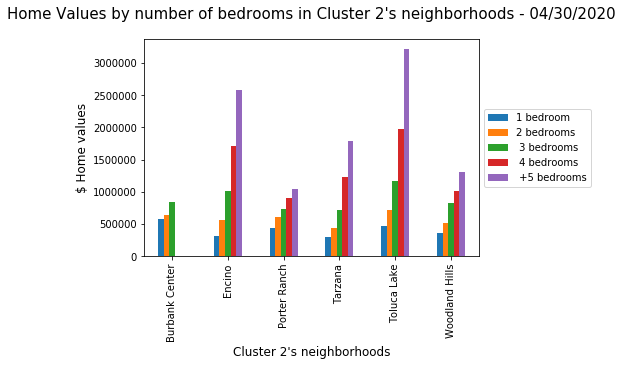

<Figure size 1080x1080 with 0 Axes>

In [206]:
ax = selected_neighbordhood_bedroom.unstack().plot(kind='bar')#, stacked=True)
plt.title("Home Values by number of bedrooms in Cluster 2's neighborhoods - 04/30/2020", fontsize=15, pad=20)
plt.ylabel('$ Home values', fontsize=12)
plt.xlabel("Cluster 2's neighborhoods", fontsize=12)          
plt.figure(figsize=(15, 15))
# Put a legend to the right of the current axis
ax.legend(['1 bedroom', '2 bedrooms', ' 3 bedrooms', ' 4 bedrooms', ' +5 bedrooms'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## V. DISCUSION: SECOND CHAPTER

Using the Cluster 2’s findings to explore the home values:
Creating a handle summary, we focused on Cluster 2’s neighborhoods with negative forecasts for April 2020.

The side by side graph shows that Toluca Lake, Encino, and Tarzana neighborhoods have higher home values, for 4 and +5 bedrooms. 
Further, Toluca Lake, Encino, and Burbank Center neighborhoods have higher home values for 3 bedrooms size. 
There are no relevant differences between the home vales with 1 or 2 bedrooms, except for Burbank Center, in which 1 bedroom size is the highest. 


## VI. Conclusion

According to these finds, we suggest working on the top five of the cuisine: Pizza, Mexican restaurants, Fast food, Sandwich places, and Asian food (Thai Restaurants, Chinese restaurants, and Seafood restaurants.)
Cluster 2 has almost the total of the venues; thus, the Restaurant's location should be placed within this area.
In sum, the client can launch the new Restaurant within these established market-top five venues and place it at any location in Cluster 2's neighborhoods. These neighborhoods are Winnetka, San Fernando, Tarzana, Granada Hills, North Hollywood, Encino, Northridge, Chatsworth, Lake View Terrace, Van Nuys, North Hills, Universal City, Lake Balboa, Sherman Oaks, Toluca Lake, Reseda, Studio City, Burbank, Porter Ranch, Panorama City, Sun Valley, Valley Village, Canoga Park, and Woodland Hills.

According to the selection of the Restaurant location, the client can proceed to decide his Home location. For the short term, he can follow the forecast and stick to the neighborhoods with negative home value prices: Burbank Center, Encino, Porter Ranch, Toluca Lake, Woodland Hills, and Tarzana.


# 10. Limitations

The structured format of the data was difficult to reach, especially for the Boroughs.
For this analysis, we researched and studied the geographic and administrative organization of Los Angeles county, concluding that the organization is not by boroughs. To simplify the selection, we dealt with two categories, our Target: San Fernando Valley, and, the Not target: =! San Fernando Valley. Hence, we reduced the colossus geography of Los Angeles County into 102 neighborhoods. Surpassing this issue, finally, we researched the clusters within the San Fernando Valley.

Getting the unique values of the most common restaurants to eat by each cluster was not a straight process, taking several inefficient attempts to refine this search. Finally, the best methods used were: .get_dummies and .stack; obtaining a frequency table that counted all the variables.  

Autor: Franchi Uzcategui